In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

Loaded the csv and checked column datatypes and numerical parameters.

In [2]:
df=pd.read_csv("C:/Users/arnav/Desktop/Python_projects/EDA/fraud_detection/data/insurance fraud claims.csv")
df.info(), df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

(None,
      months_as_customer  age  policy_number policy_bind_date policy_state  \
 0                   328   48         521585       2014-10-17           OH   
 1                   228   42         342868       2006-06-27           IN   
 2                   134   29         687698       2000-09-06           OH   
 3                   256   41         227811       1990-05-25           IL   
 4                   228   44         367455       2014-06-06           IL   
 ..                  ...  ...            ...              ...          ...   
 995                   3   38         941851       1991-07-16           OH   
 996                 285   41         186934       2014-01-05           IL   
 997                 130   34         918516       2003-02-17           OH   
 998                 458   62         533940       2011-11-18           IL   
 999                 456   60         556080       1996-11-11           OH   
 
     policy_csl  policy_deductable  policy_annual_premi

In [3]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Checked for number of null values & duplicate values per column

In [4]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
df.duplicated().sum()

np.int64(0)

Checked for dataset imbalance

In [6]:
df["fraud_reported"].value_counts()


fraud_reported
N    753
Y    247
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

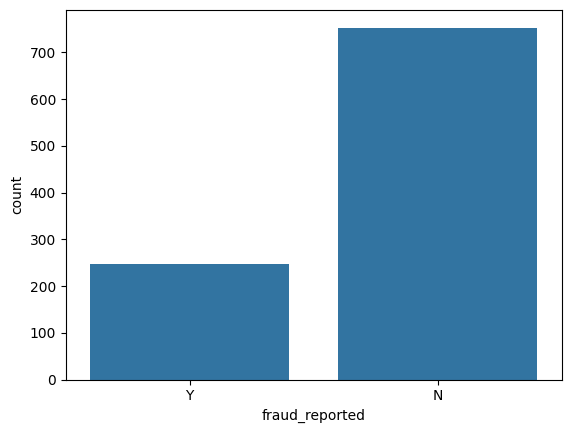

In [7]:
sns.countplot(x="fraud_reported",data=df)
plt.show

Created a list of numerical columns, dropped unnecessary columns and target column in excluded.

In [8]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()

drop_cols=["policy_number","insured_zip","_c39"]
num_cols=[col for col in num_cols if col not in drop_cols + ["fraud_reported"]]

num_cols

['months_as_customer',
 'age',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year']

Checked the parameters of numerical columns.

In [9]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00
number_of_vehicles_involved,1000.0,1.839000e+00,1.018880e+00,1.00,1.0000,1.0,3.000,4.00
bodily_injuries,1000.0,9.920000e-01,8.201272e-01,0.00,0.0000,1.0,2.000,2.00


In [10]:
df[num_cols].isnull().sum(),df[num_cols].nunique()

(months_as_customer             0
 age                            0
 policy_deductable              0
 policy_annual_premium          0
 umbrella_limit                 0
 capital-gains                  0
 capital-loss                   0
 incident_hour_of_the_day       0
 number_of_vehicles_involved    0
 bodily_injuries                0
 witnesses                      0
 total_claim_amount             0
 injury_claim                   0
 property_claim                 0
 vehicle_claim                  0
 auto_year                      0
 dtype: int64,
 months_as_customer             391
 age                             46
 policy_deductable                3
 policy_annual_premium          991
 umbrella_limit                  11
 capital-gains                  338
 capital-loss                   354
 incident_hour_of_the_day        24
 number_of_vehicles_involved      4
 bodily_injuries                  3
 witnesses                        4
 total_claim_amount             763
 injury_c

Plotted histograms, boxplots and heatmap for numerical columns.

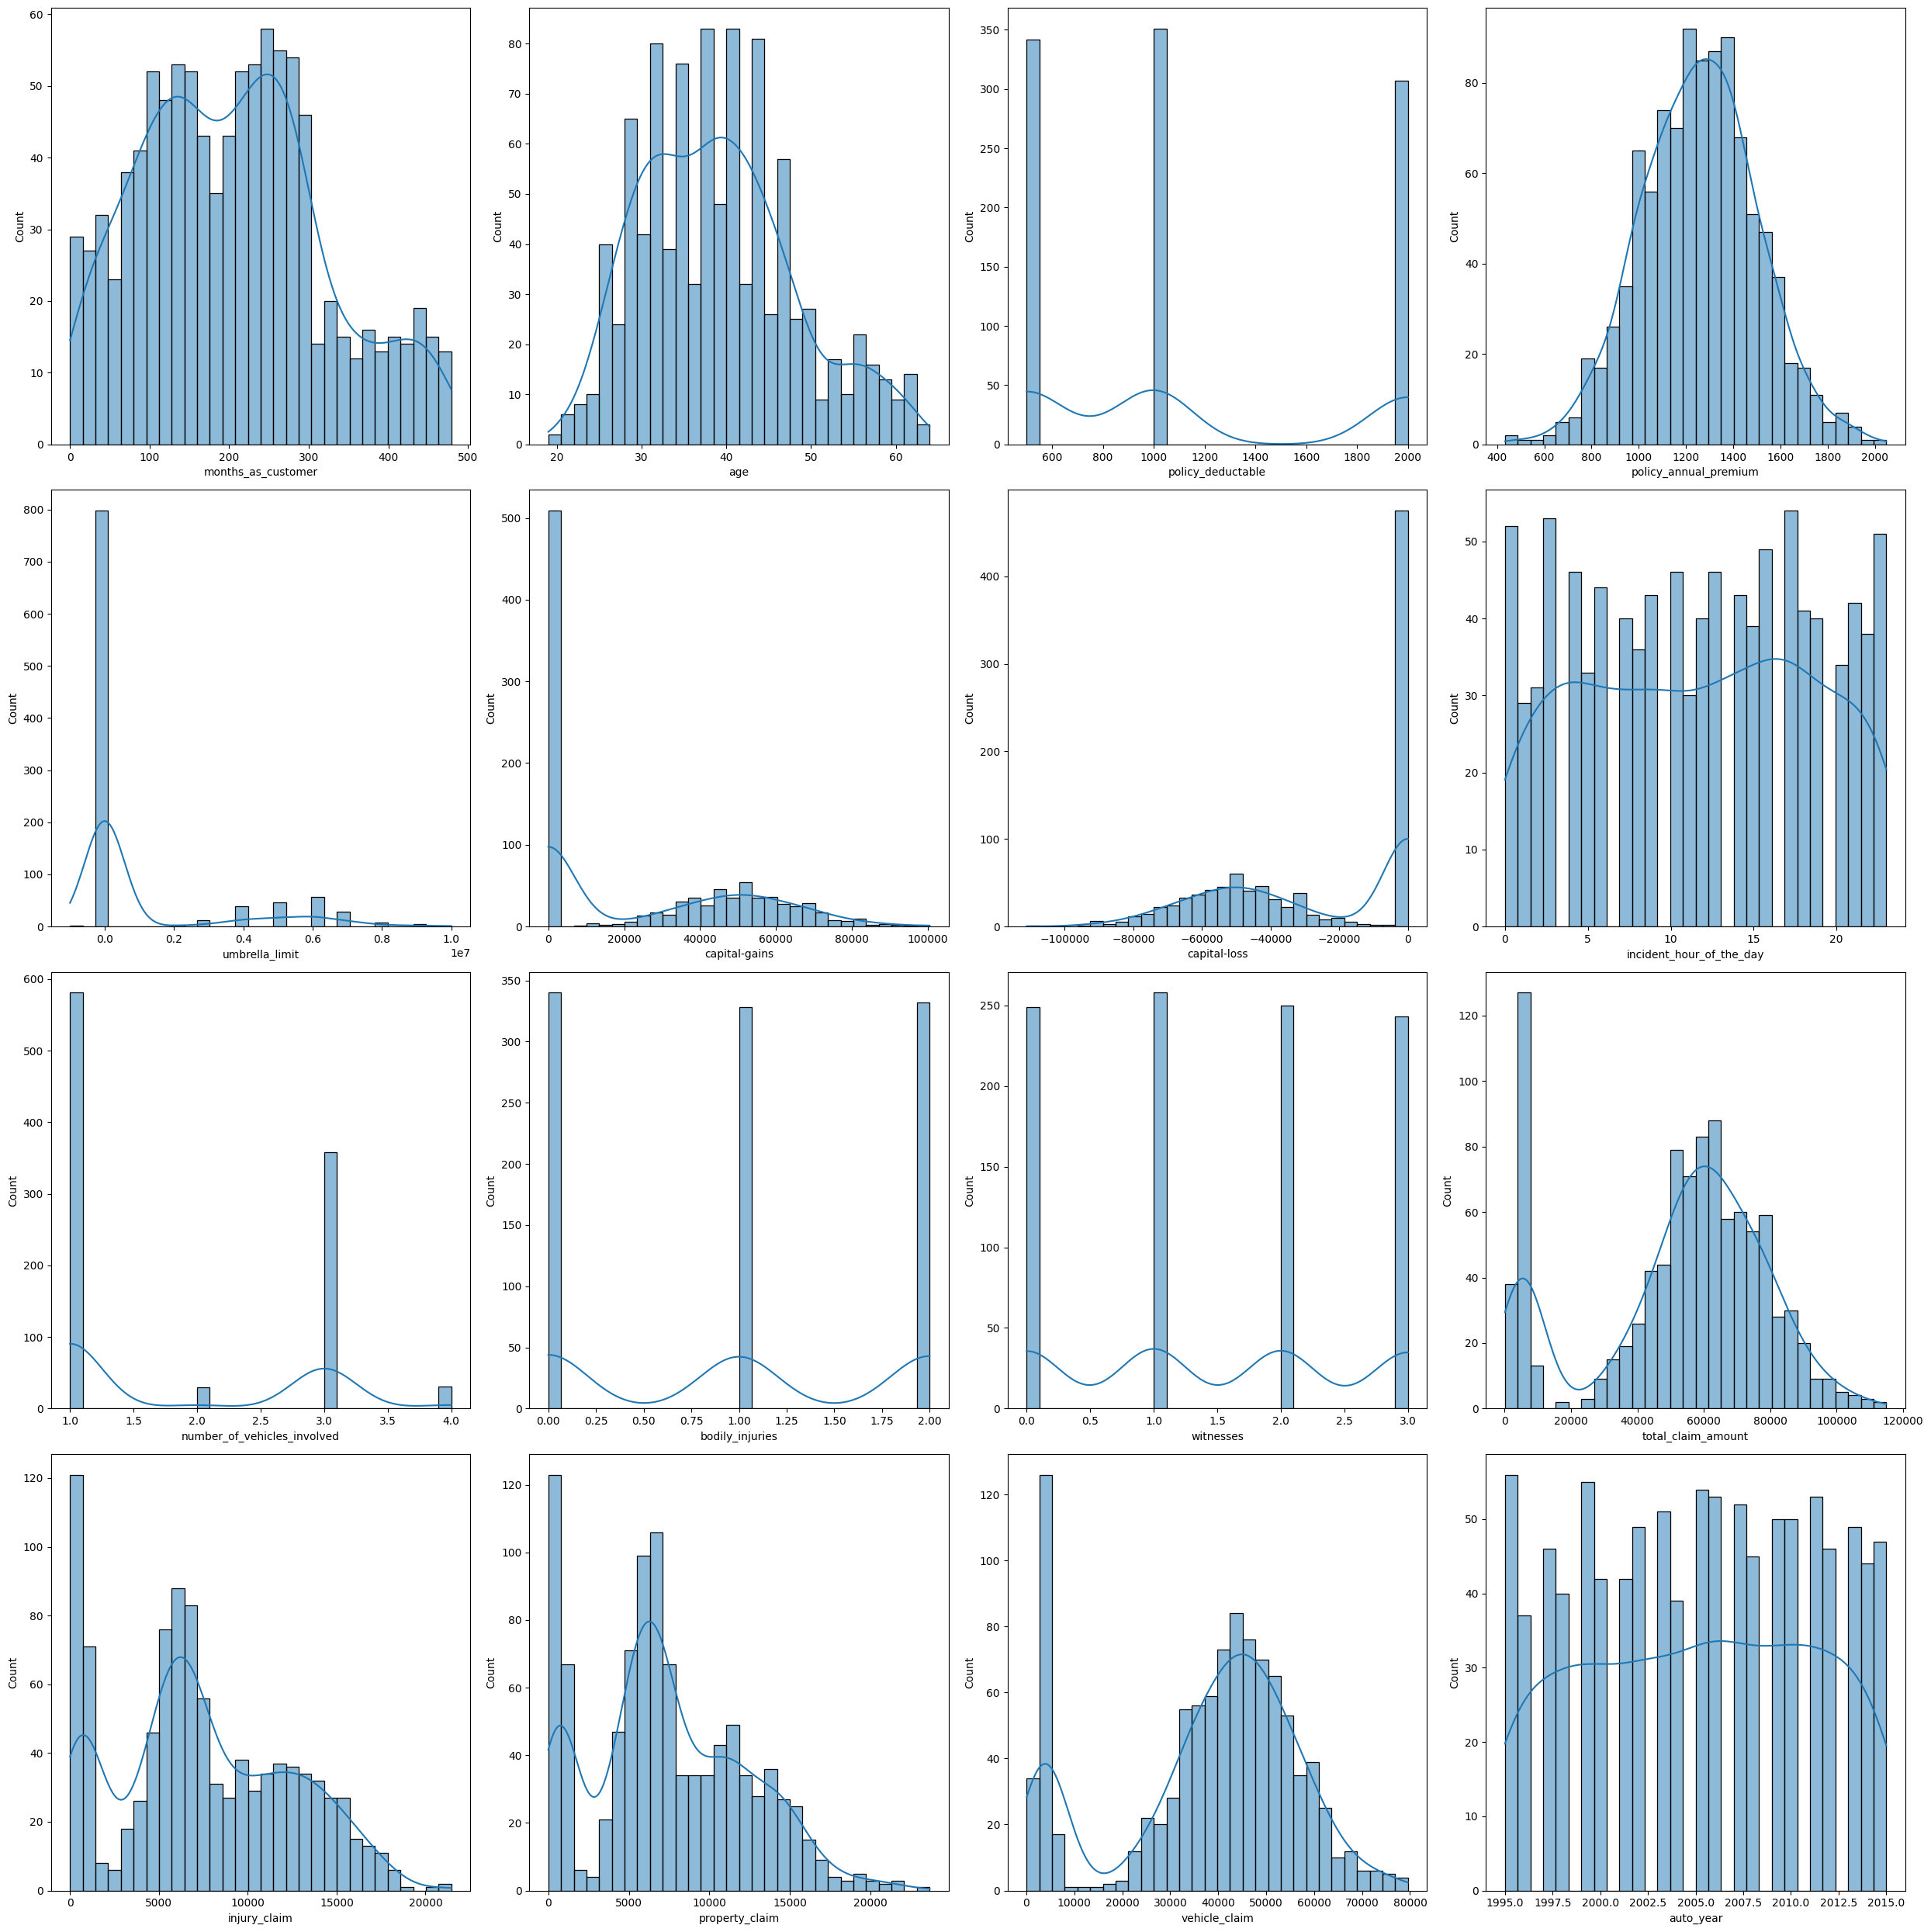

In [11]:
plt.figure(figsize=(25,25))

for i,col in enumerate(num_cols,1):
    plt.subplot(4,4,i)
    sns.histplot(df[col],bins=30,kde=True)
plt.tight_layout()
plt.show()

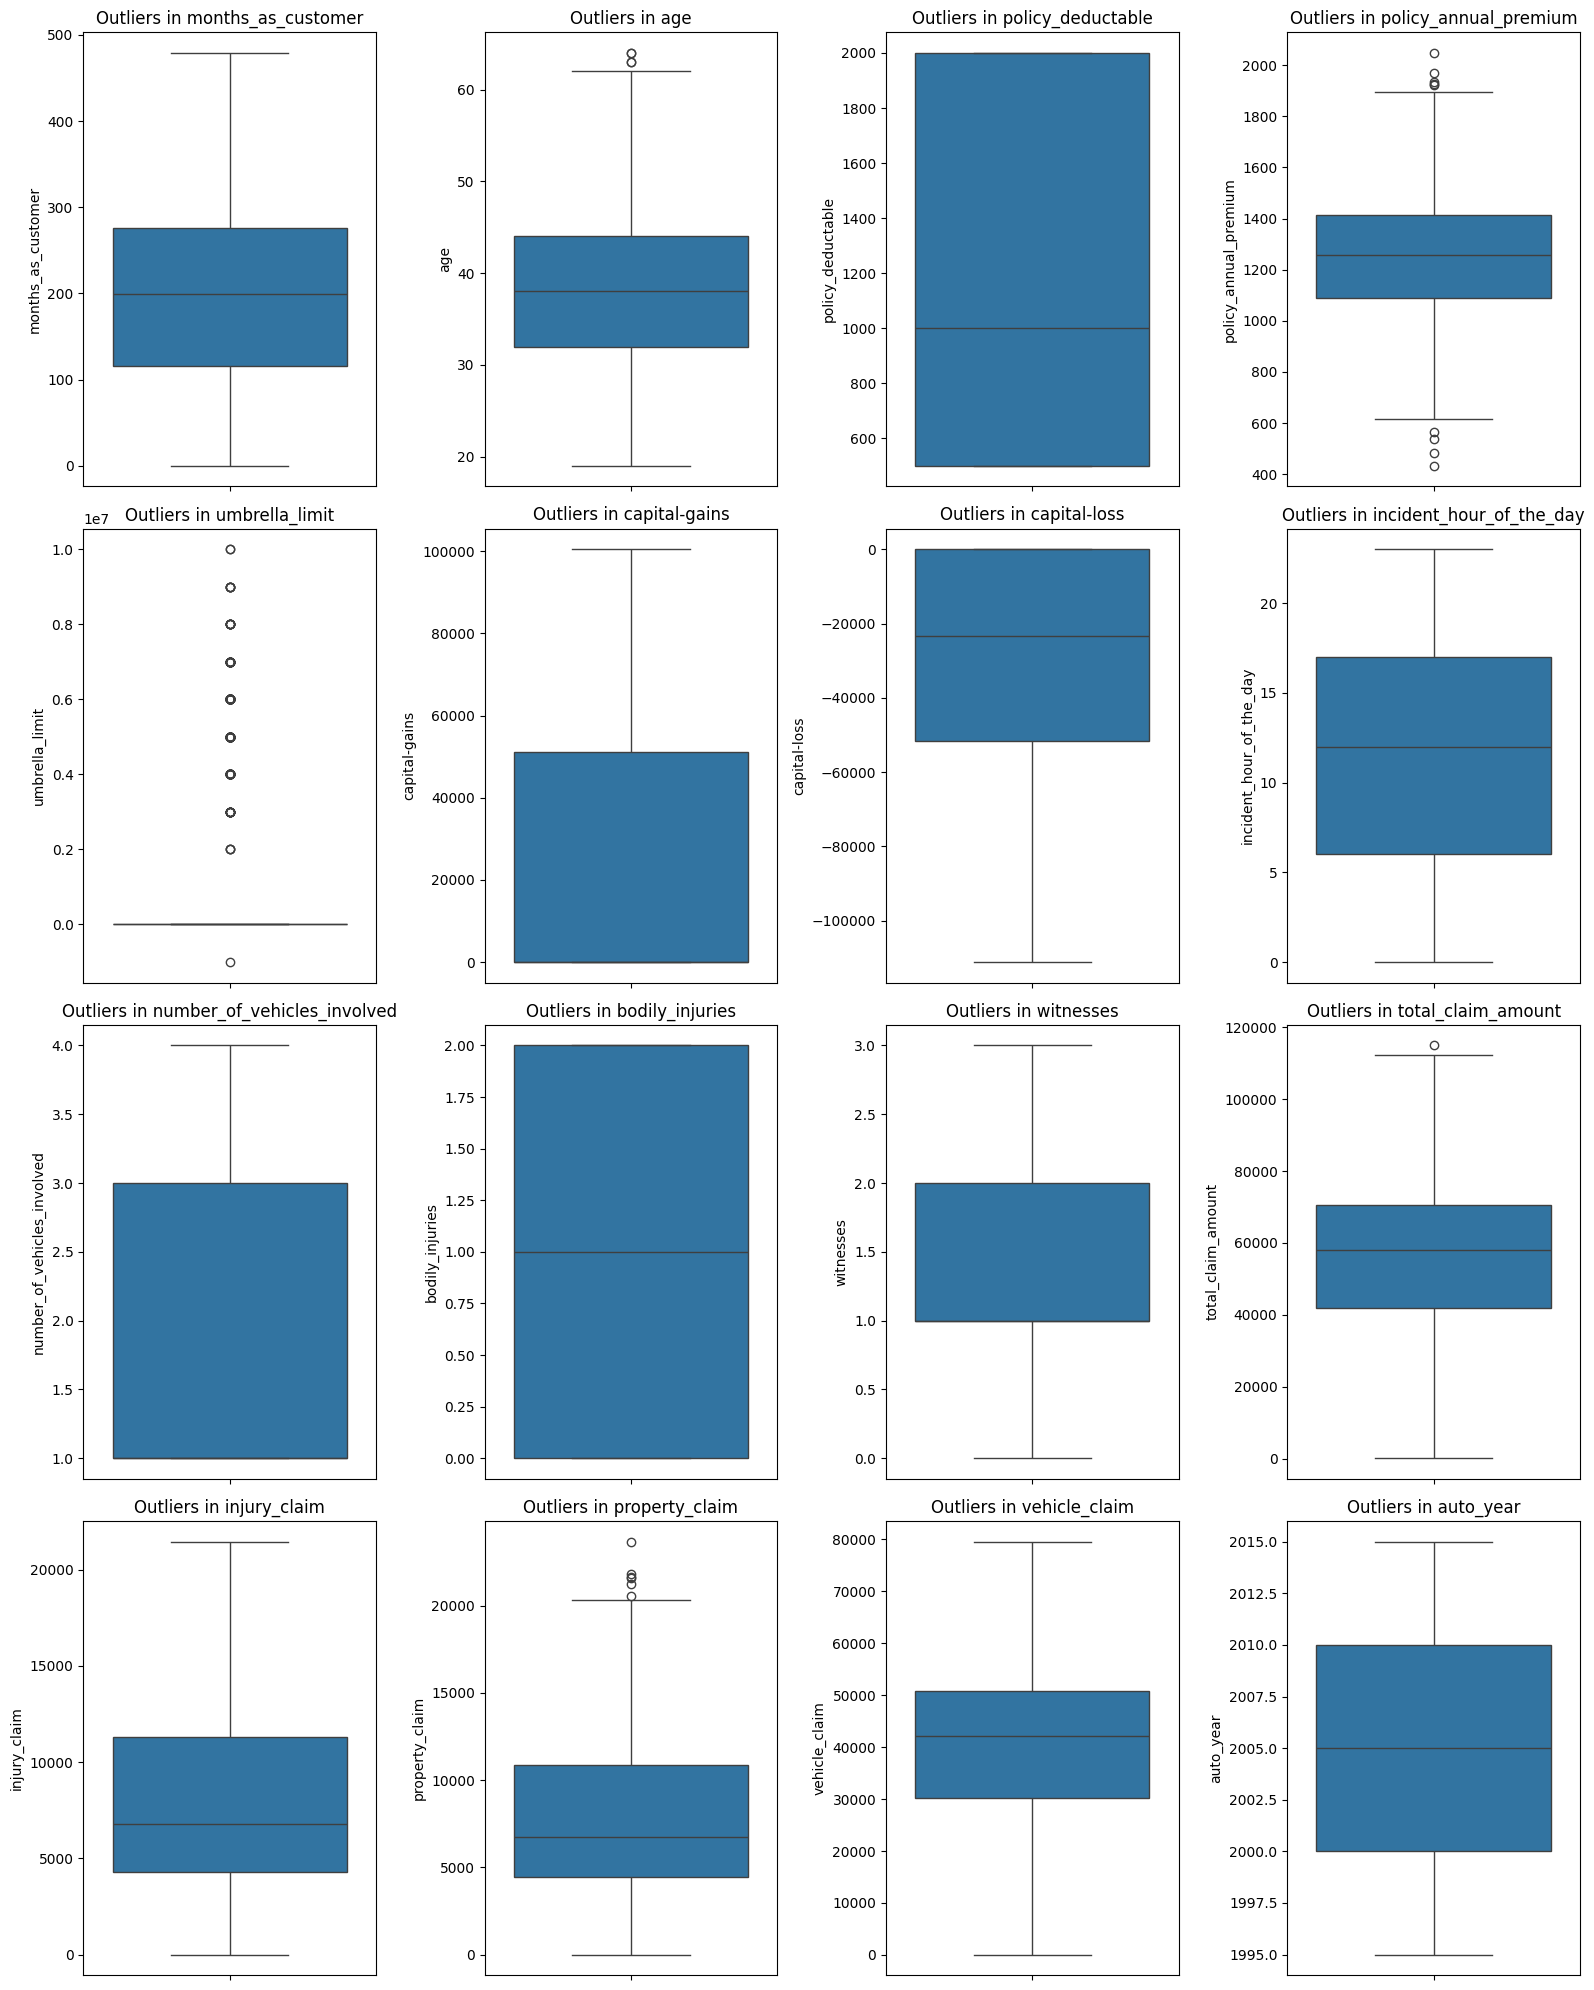

In [12]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Outliers in {col}")
plt.tight_layout()
plt.show()

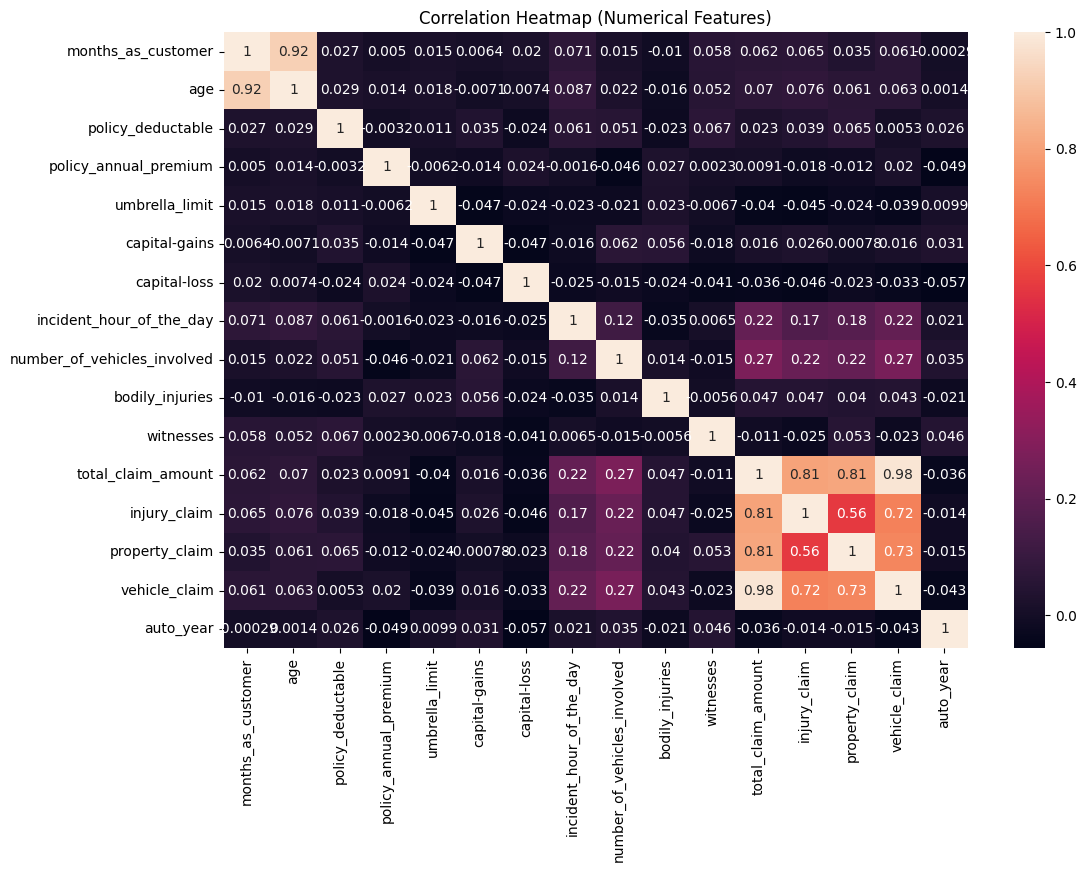

In [13]:
plt.figure(figsize=(12, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

Converted the fraud reported column to numerical target column with mapping

In [14]:
df['target']=df['fraud_reported'].map({'Y':1,'N':0})

The dataset is splitted into Fraud and Non-fraud for numerical columns and mean is calculated.

In [15]:
fraud_compare_num = df.groupby('target')[num_cols].mean().T
fraud_compare_num.rename(columns={0:'Non-Fraud', 1:'Fraud'}, inplace=True)
fraud_compare_num


target,Non-Fraud,Fraud
months_as_customer,2.026003e+02,2.080810e+02
age,3.888446e+01,3.914170e+01
policy_deductable,1.130810e+03,1.151822e+03
policy_annual_premium,1.258430e+03,1.250236e+03
umbrella_limit,1.023904e+06,1.336032e+06
capital-gains,2.543201e+04,2.419352e+04
capital-loss,-2.655458e+04,-2.752267e+04
incident_hour_of_the_day,1.162683e+01,1.169636e+01
number_of_vehicles_involved,1.808765e+00,1.931174e+00
bodily_injuries,9.760956e-01,1.040486e+00


KDE plot, box plot is plotted for numerical columns to check for the difference between fraud and non-fraud.

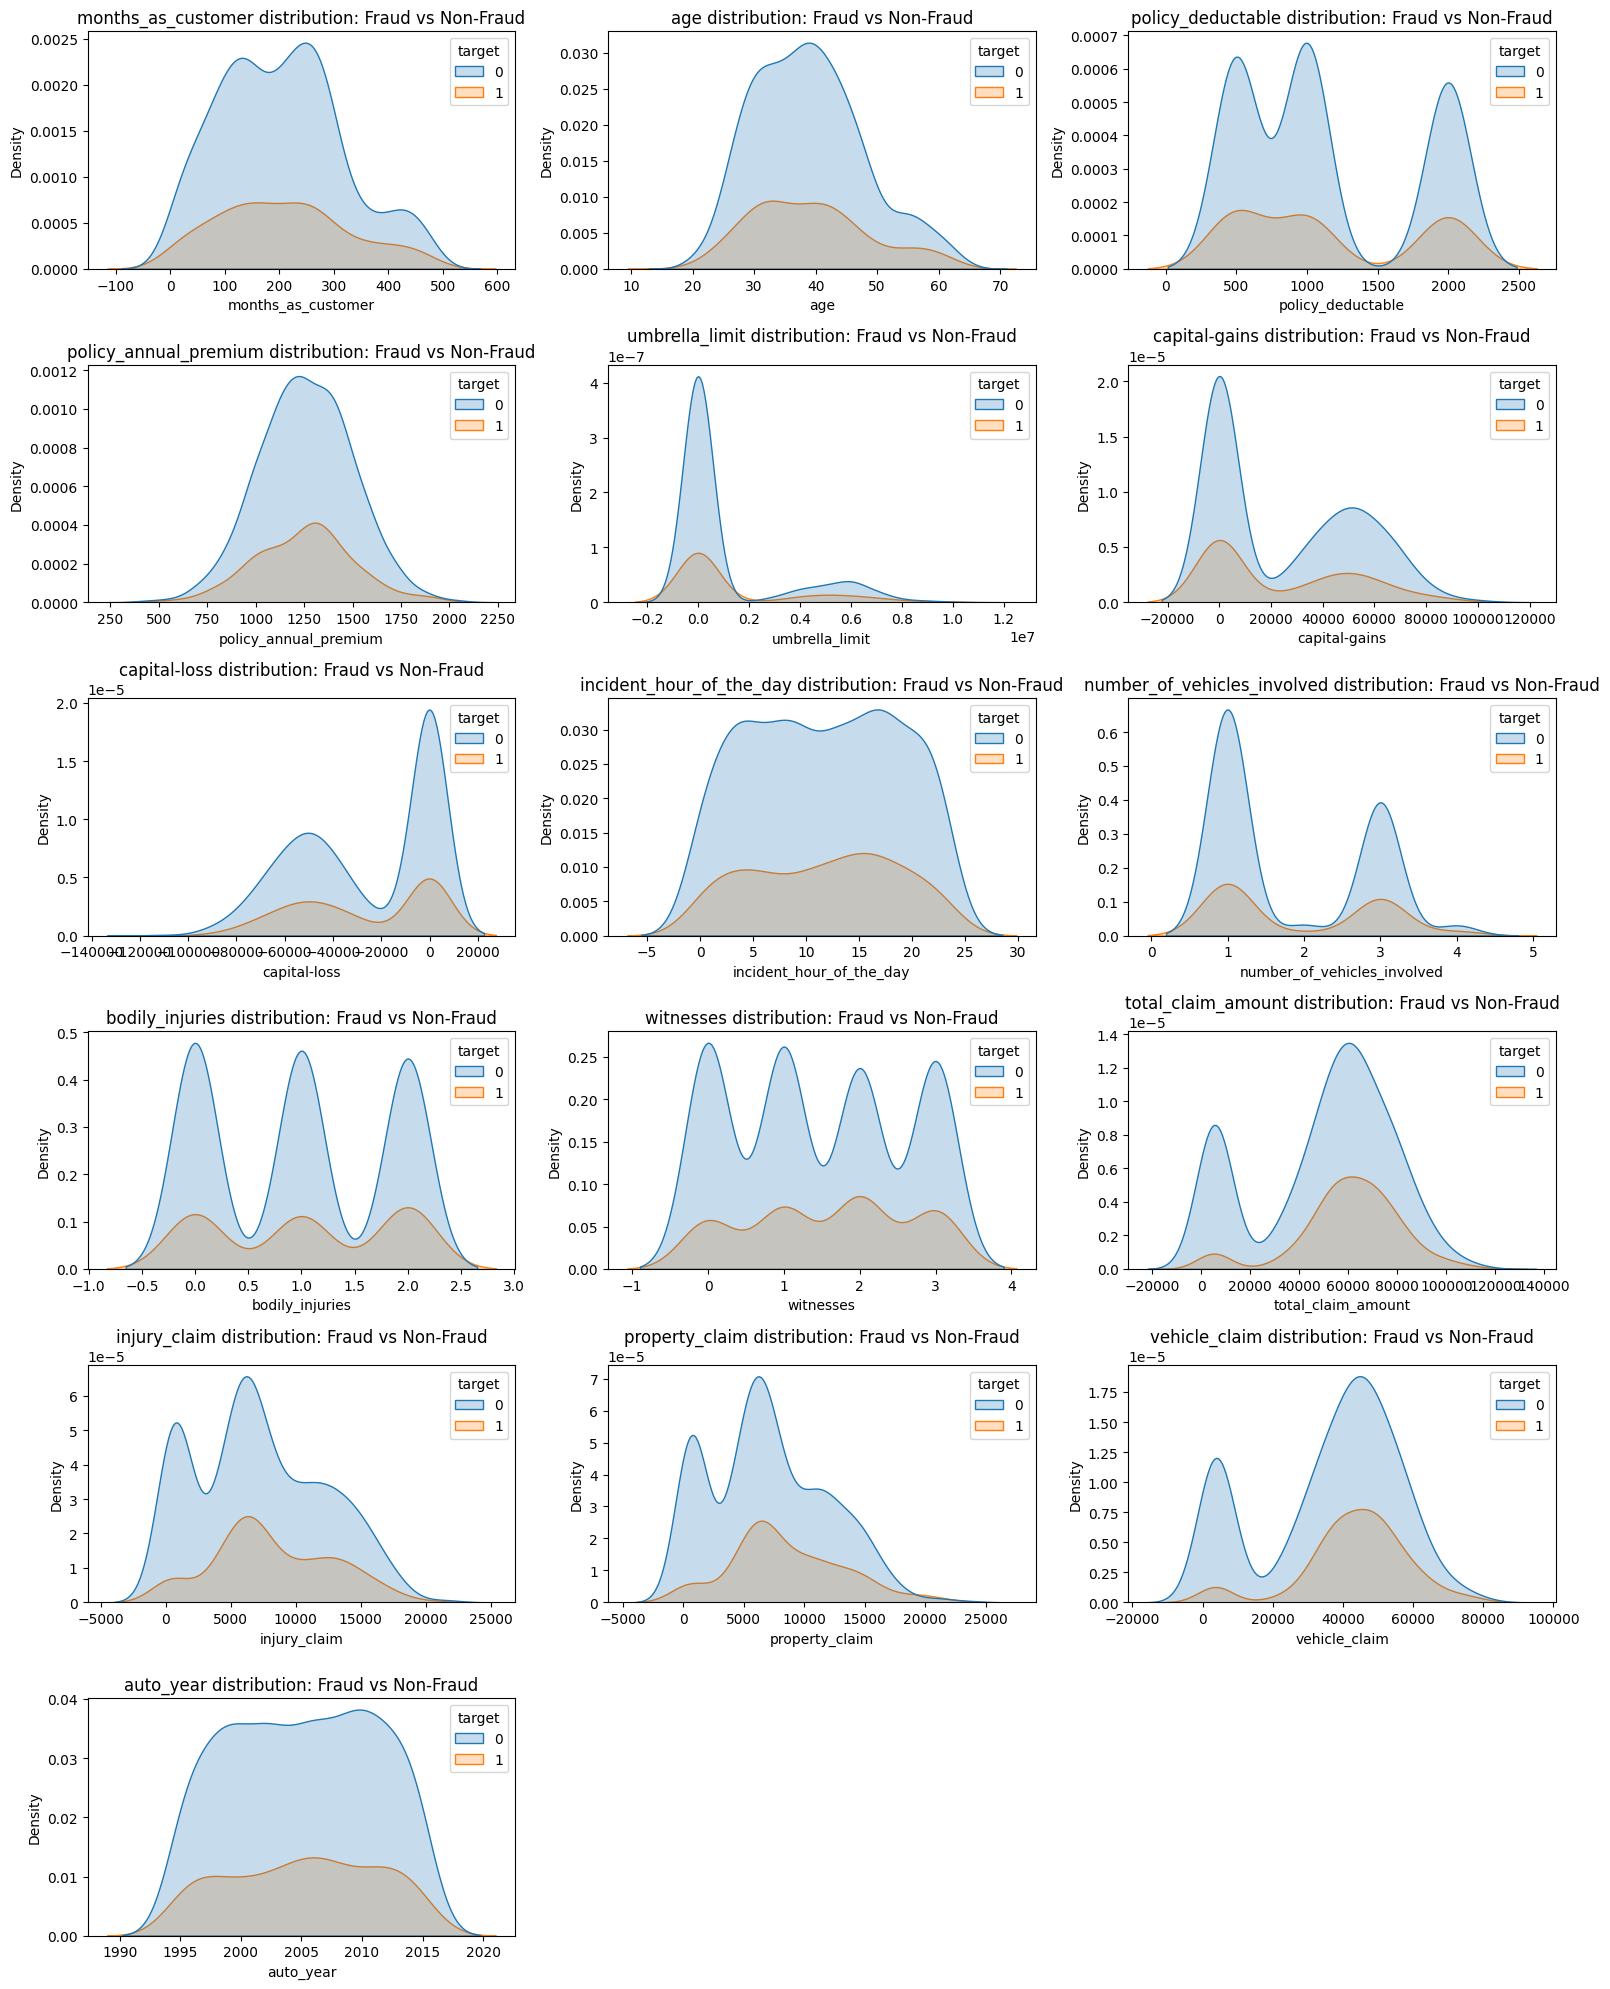

In [16]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(6, 3, i)
    sns.kdeplot(data=df, x=col, hue='target', fill=True)
    plt.title(f"{col} distribution: Fraud vs Non-Fraud")
plt.tight_layout()
plt.show()


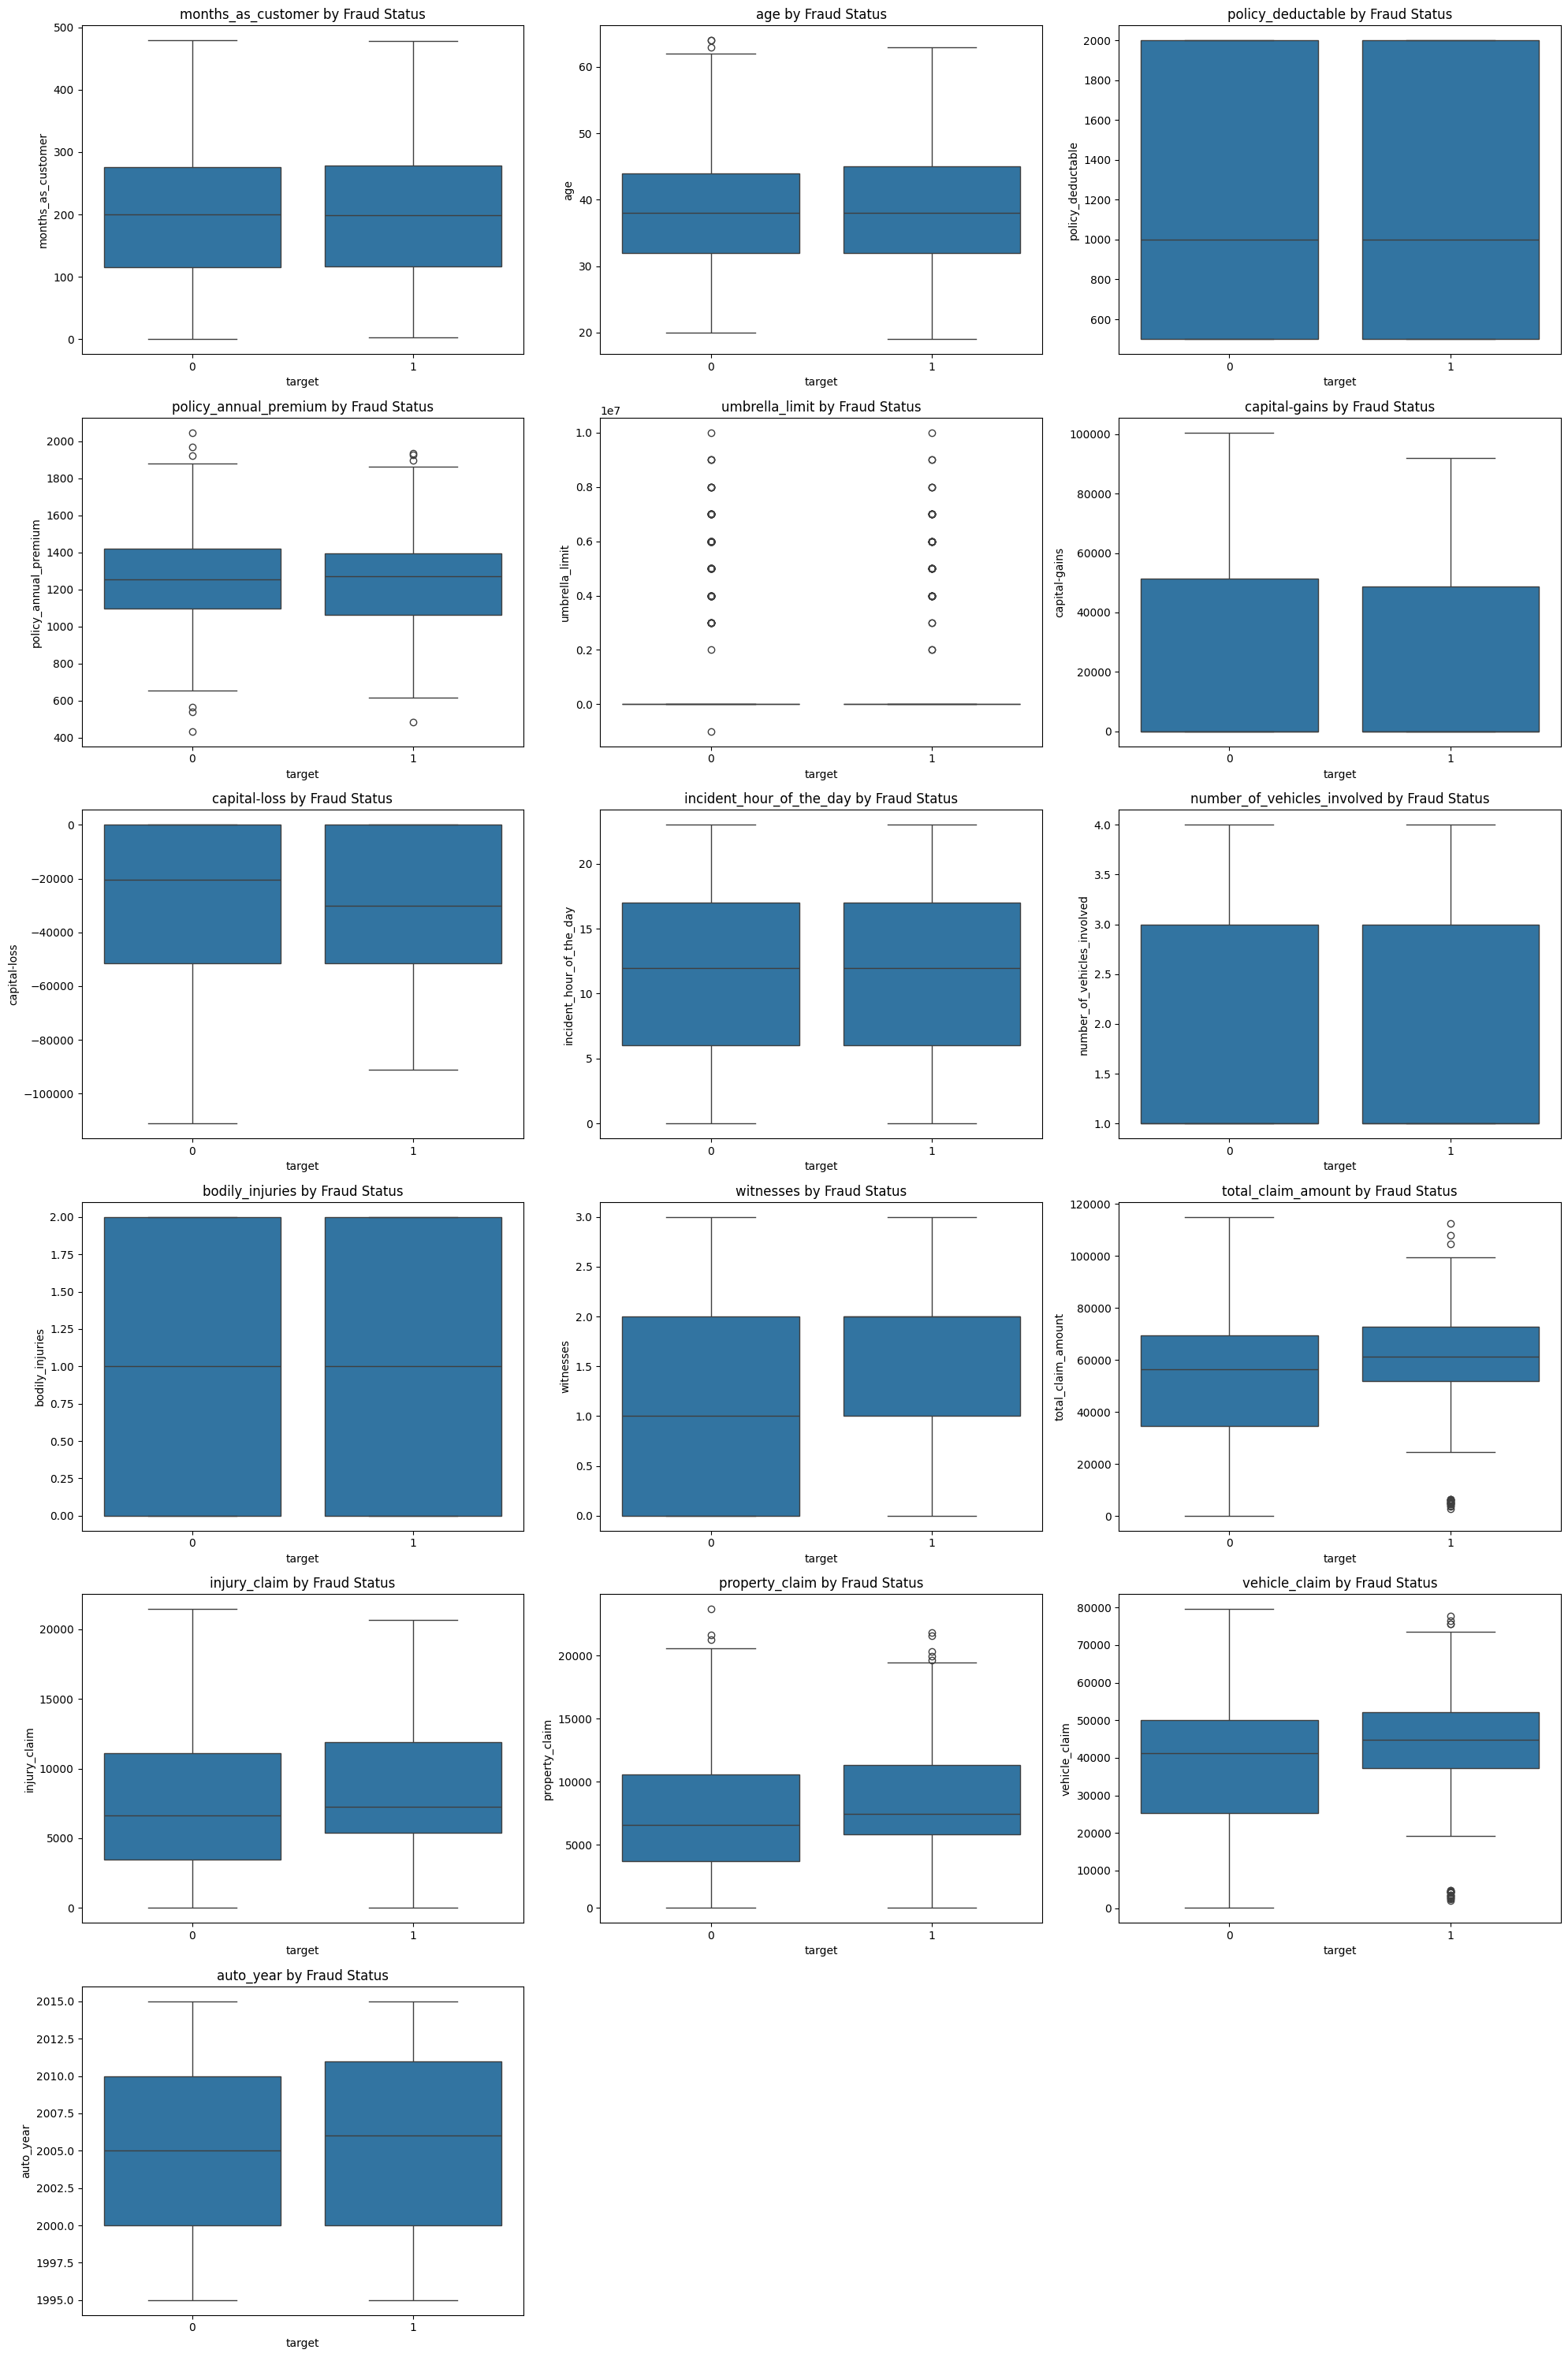

In [17]:
plt.figure(figsize=(20, 30))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3 + 1, 3, i)
    sns.boxplot(data=df, x='target', y=col)
    plt.title(f"{col} by Fraud Status")

plt.tight_layout()
plt.show()


Correlation values for numerical columns are checked against the target column.

In [18]:
df[num_cols + ['target']].corr()['target'].sort_values(ascending=False)

target                         1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
injury_claim                   0.090975
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
months_as_customer             0.020544
policy_deductable              0.014817
age                            0.012143
auto_year                      0.007928
incident_hour_of_the_day       0.004316
policy_annual_premium         -0.014480
capital-loss                  -0.014863
capital-gains                 -0.019173
Name: target, dtype: float64

Converted date string/object in datetime64 pandas format and engineered related time columns. Countplots and boxplots are plotted to check most frequent incident month and policy duration Vs Fraud/Non-fraud relation.

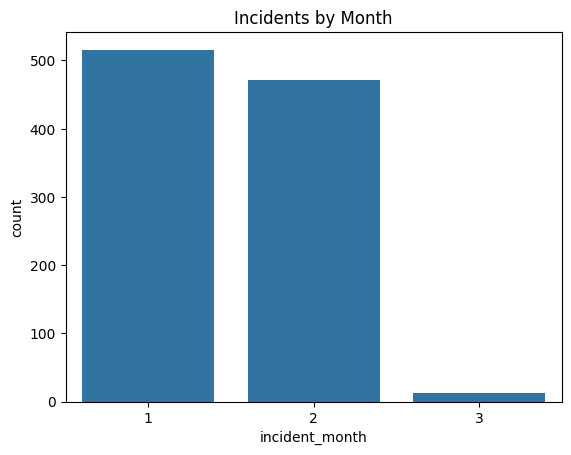

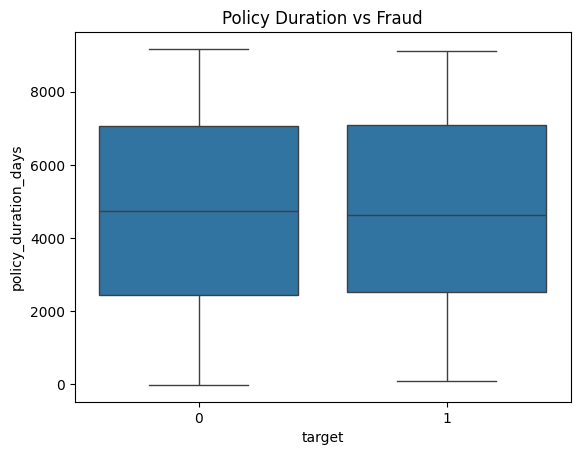

In [19]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

df['policy_duration_days'] = (df['incident_date'] - df['policy_bind_date']).dt.days
df['incident_month'] = df['incident_date'].dt.month
df['incident_day_of_week'] = df['incident_date'].dt.dayofweek

sns.countplot(x='incident_month', data=df)
plt.title("Incidents by Month")
plt.show()

sns.boxplot(x='target', y='policy_duration_days', data=df)
plt.title("Policy Duration vs Fraud")
plt.show()


Category columns except fraud reported column are placed in a list.

In [20]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col != 'fraud_reported']
cat_cols


['policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model']

Printed all unique values in each categorical column and their frequencies, include missing values

In [21]:
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))



--- policy_state ---
policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64

--- policy_csl ---
policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64

--- insured_sex ---
insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64

--- insured_education_level ---
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64

--- insured_occupation ---
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64

--- insured_hobbies ---
insured_hobbies
reading           64
exercise          57
paintball

Checked for columns with unique values more than 15 and less than 15

In [22]:
high_cardinality = [col for col in cat_cols if df[col].nunique() > 15]
low_cardinality  = [col for col in cat_cols if df[col].nunique() <= 15]

high_cardinality, low_cardinality


(['insured_hobbies', 'incident_location', 'auto_model'],
 ['policy_state',
  'policy_csl',
  'insured_sex',
  'insured_education_level',
  'insured_occupation',
  'insured_relationship',
  'incident_type',
  'collision_type',
  'incident_severity',
  'authorities_contacted',
  'incident_state',
  'incident_city',
  'property_damage',
  'police_report_available',
  'auto_make'])

Countplot for low cardinal columns

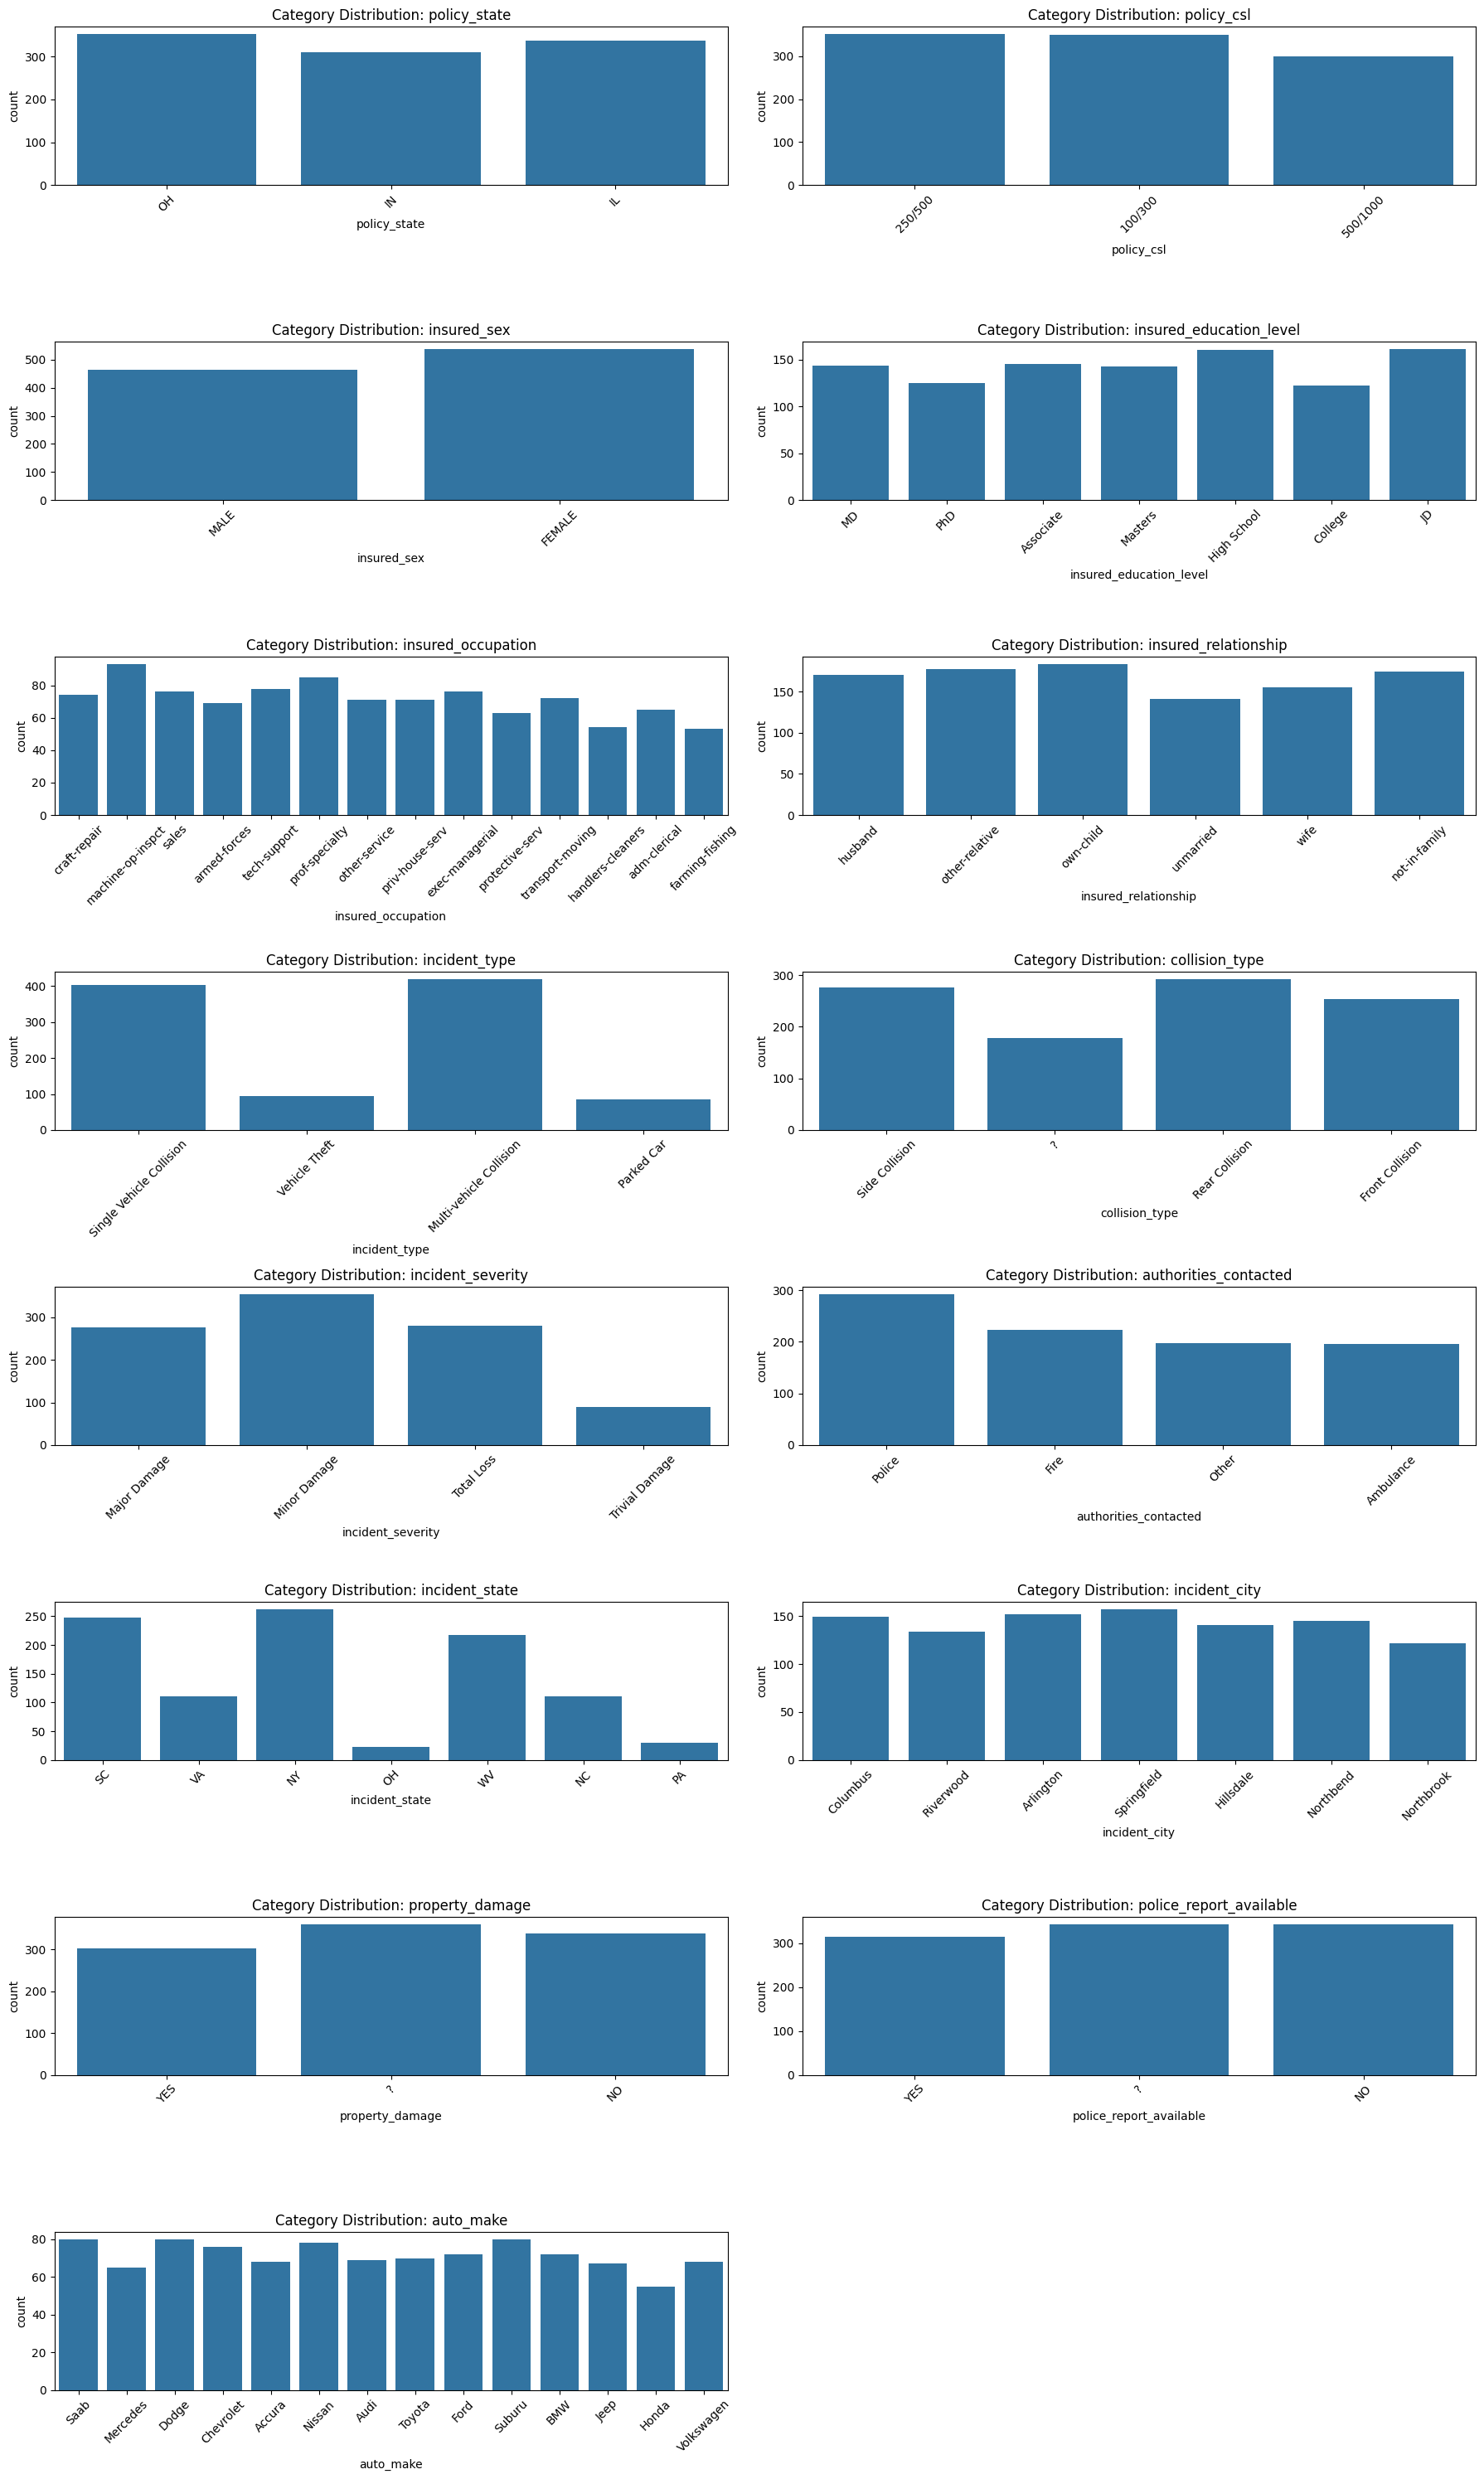

In [23]:
plt.figure(figsize=(18, 30))

for i, col in enumerate(low_cardinality, 1):
    plt.subplot(len(low_cardinality)//2 + 1, 2, i)
    sns.countplot(data=df, x=col)
    plt.title(f"Category Distribution: {col}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


Barplot for high cardinal data

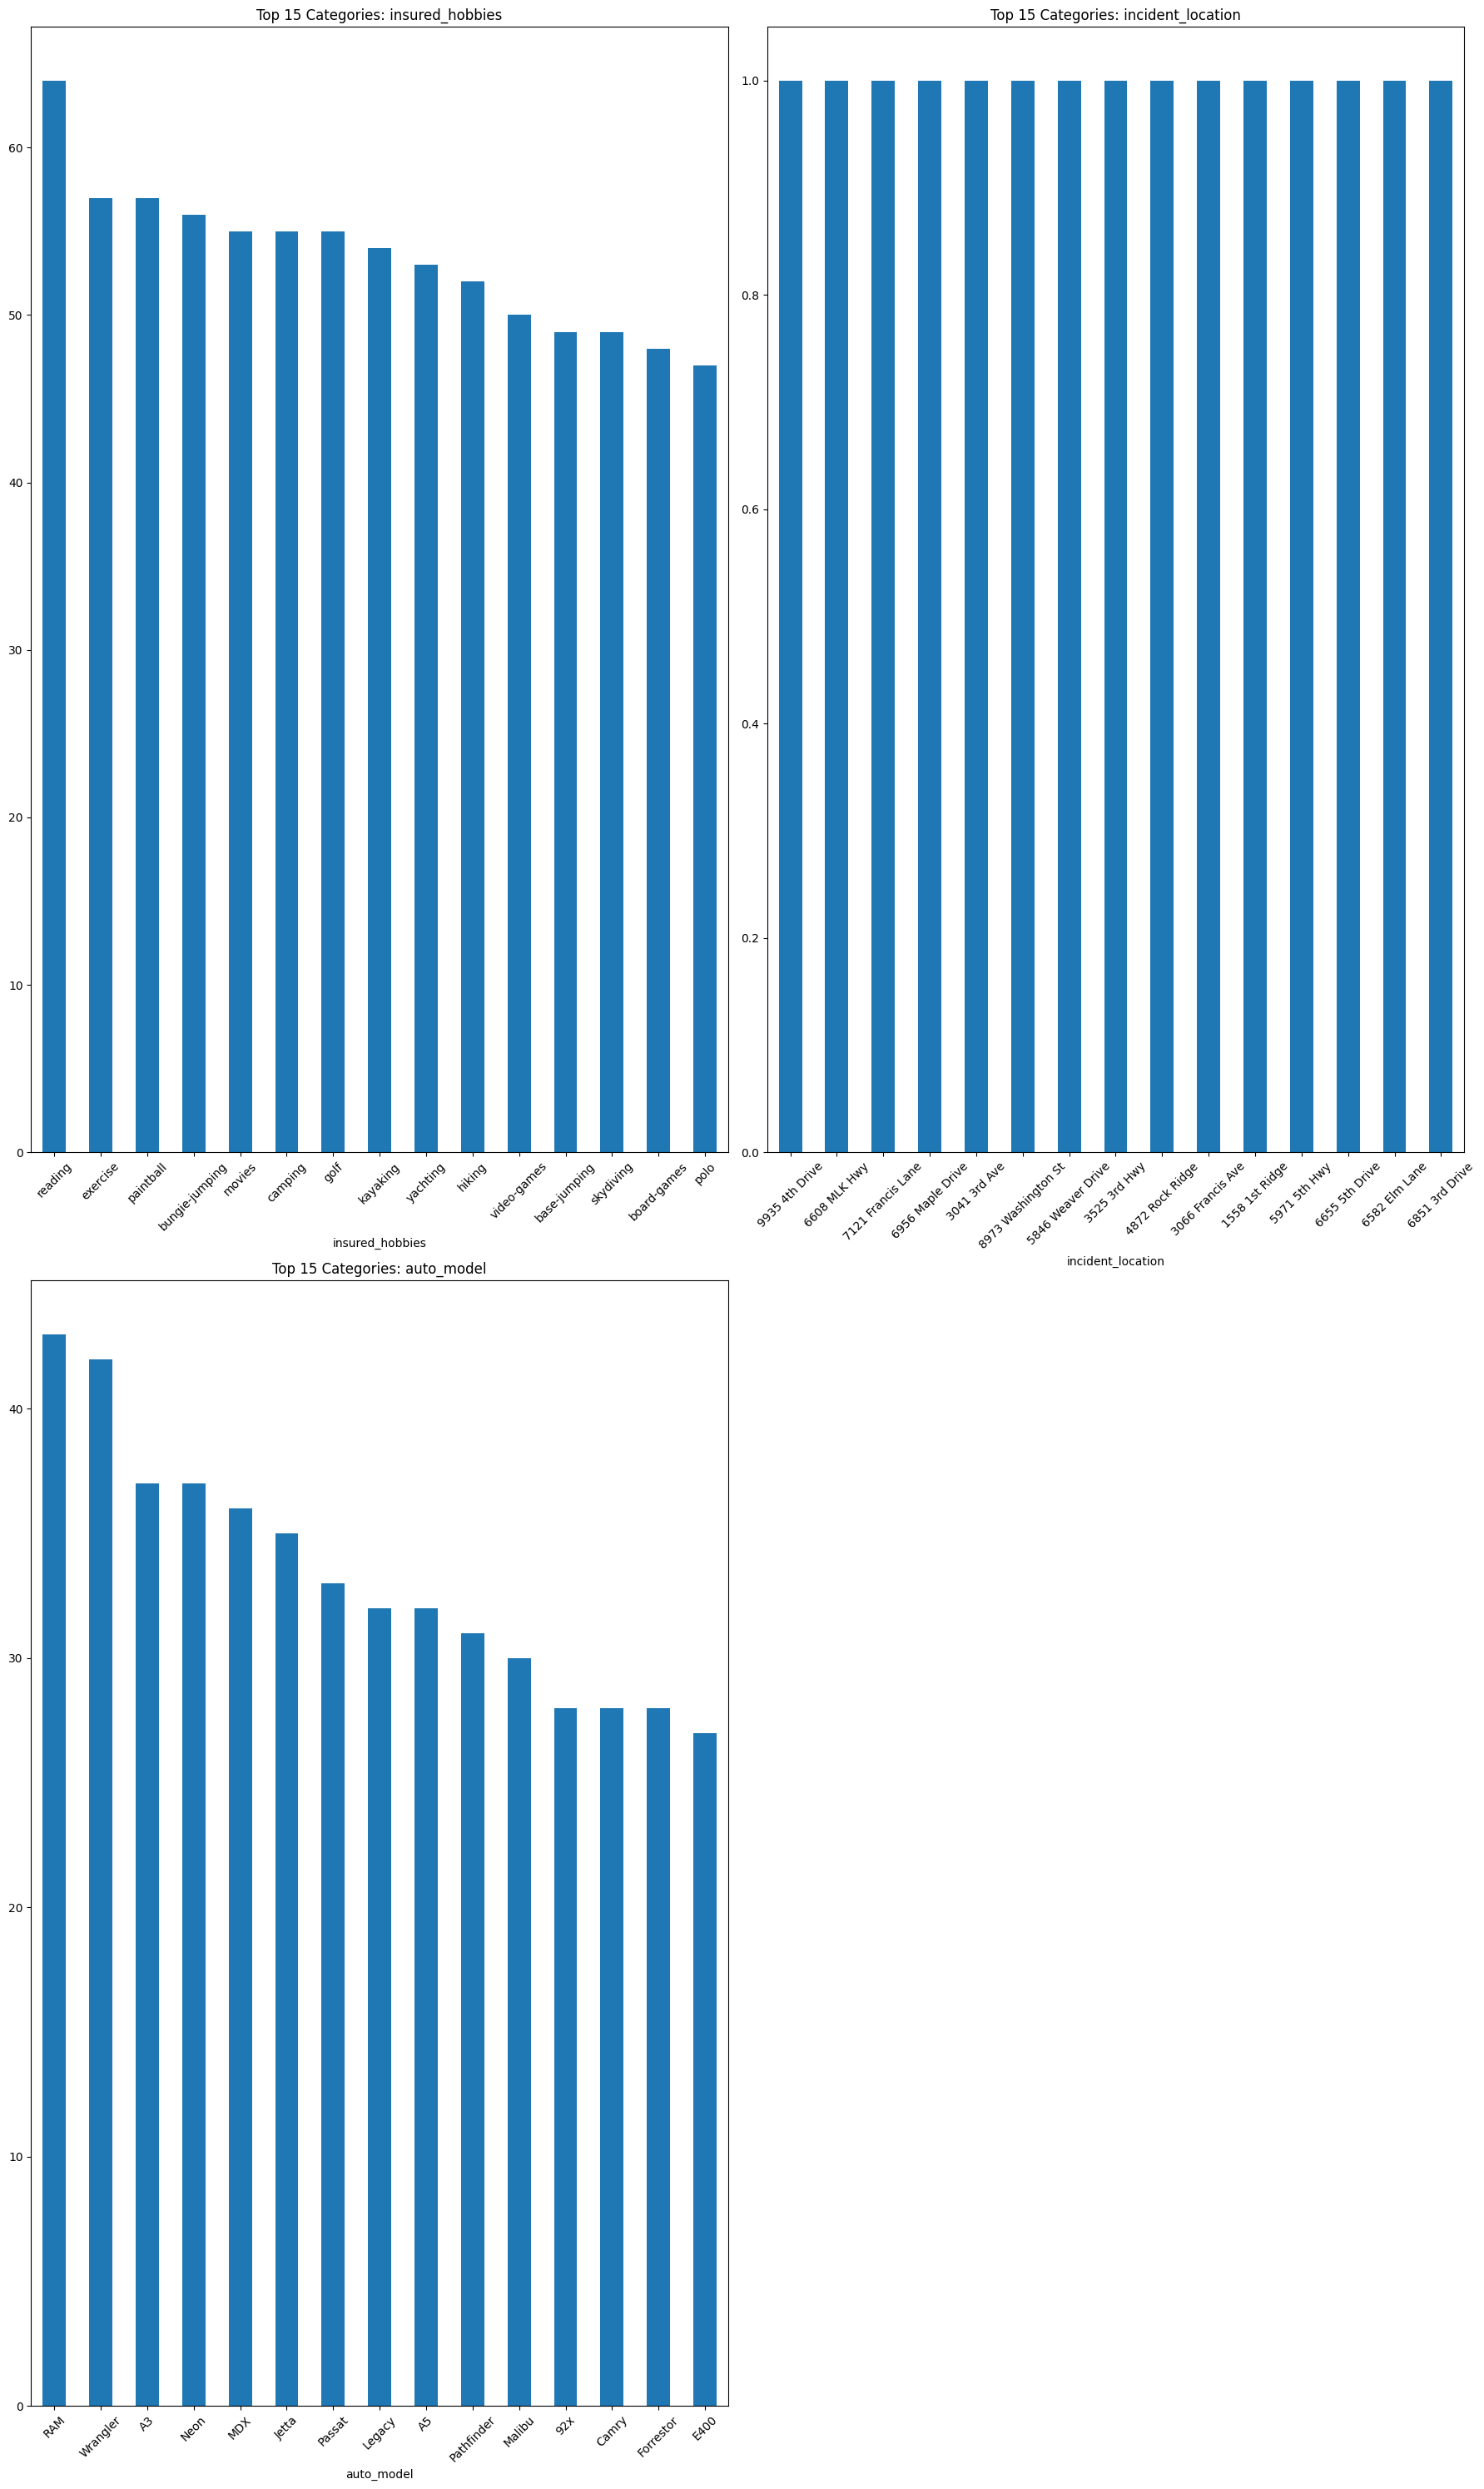

In [24]:
plt.figure(figsize=(18, 30))

for i, col in enumerate(high_cardinality, 1):
    plt.subplot(len(high_cardinality)//2 + 1, 2, i)
    df[col].value_counts().head(15).plot(kind='bar')
    plt.title(f"Top 15 Categories: {col}")
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()


Calculated fraud rate per category in descending order for each categorical column.

In [25]:
fraud_cat_rates = {}

for col in cat_cols:
    fraud_cat_rates[col] = (
        df.groupby(col)['target']
        .mean()
        .sort_values(ascending=False)
    )


In [26]:
for col, summary in fraud_cat_rates.items():
    print(f"\nFraud Rate by {col}")
    display(summary)



Fraud Rate by policy_state


policy_state
OH    0.258523
IN    0.254839
IL    0.227811
Name: target, dtype: float64


Fraud Rate by policy_csl


policy_csl
250/500     0.262108
100/300     0.257880
500/1000    0.216667
Name: target, dtype: float64


Fraud Rate by insured_sex


insured_sex
MALE      0.261339
FEMALE    0.234637
Name: target, dtype: float64


Fraud Rate by insured_education_level


insured_education_level
PhD            0.264000
MD             0.263889
College        0.262295
JD             0.260870
Associate      0.234483
High School    0.225000
Masters        0.223776
Name: target, dtype: float64


Fraud Rate by insured_occupation


insured_occupation
exec-managerial      0.368421
farming-fishing      0.301887
craft-repair         0.297297
transport-moving     0.291667
tech-support         0.282051
sales                0.276316
armed-forces         0.246377
machine-op-inspct    0.236559
protective-serv      0.222222
prof-specialty       0.211765
handlers-cleaners    0.203704
adm-clerical         0.169231
priv-house-serv      0.169014
other-service        0.169014
Name: target, dtype: float64


Fraud Rate by insured_hobbies


insured_hobbies
chess             0.826087
cross-fit         0.742857
yachting          0.301887
board-games       0.291667
polo              0.276596
reading           0.265625
base-jumping      0.265306
hiking            0.230769
paintball         0.228070
skydiving         0.224490
video-games       0.200000
sleeping          0.195122
exercise          0.192982
basketball        0.176471
movies            0.163636
bungie-jumping    0.160714
dancing           0.116279
golf              0.109091
kayaking          0.092593
camping           0.090909
Name: target, dtype: float64


Fraud Rate by insured_relationship


insured_relationship
other-relative    0.293785
wife              0.270968
not-in-family     0.258621
unmarried         0.241135
own-child         0.213115
husband           0.205882
Name: target, dtype: float64


Fraud Rate by incident_type


incident_type
Single Vehicle Collision    0.290323
Multi-vehicle Collision     0.272076
Parked Car                  0.095238
Vehicle Theft               0.085106
Name: target, dtype: float64


Fraud Rate by collision_type


collision_type
Rear Collision     0.311644
Front Collision    0.275591
Side Collision     0.253623
?                  0.089888
Name: target, dtype: float64


Fraud Rate by incident_severity


incident_severity
Major Damage      0.605072
Total Loss        0.128571
Minor Damage      0.107345
Trivial Damage    0.066667
Name: target, dtype: float64


Fraud Rate by authorities_contacted


authorities_contacted
Other        0.318182
Ambulance    0.290816
Fire         0.269058
Police       0.208904
Name: target, dtype: float64


Fraud Rate by incident_state


incident_state
OH    0.434783
NC    0.309091
SC    0.294355
PA    0.266667
VA    0.227273
NY    0.221374
WV    0.179724
Name: target, dtype: float64


Fraud Rate by incident_city


incident_city
Arlington      0.289474
Columbus       0.261745
Hillsdale      0.248227
Springfield    0.242038
Northbend      0.234483
Riverwood      0.223881
Northbrook     0.221311
Name: target, dtype: float64


Fraud Rate by incident_location


incident_location
1173 Andromedia Ave    1.0
9929 Rock Drive        1.0
9935 4th Drive         1.0
9942 Tree Ave          1.0
9980 Lincoln Ave       1.0
                      ... 
9798 Sky Ridge         0.0
1110 4th Drive         0.0
1102 Apache Hwy        0.0
1091 1st Drive         0.0
1087 Flute Drive       0.0
Name: target, Length: 1000, dtype: float64


Fraud Rate by property_damage


property_damage
?      0.286111
YES    0.258278
NO     0.195266
Name: target, dtype: float64


Fraud Rate by police_report_available


police_report_available
?      0.259475
NO     0.250729
YES    0.229299
Name: target, dtype: float64


Fraud Rate by auto_make


auto_make
Mercedes      0.338462
Ford          0.305556
Audi          0.304348
Volkswagen    0.279412
BMW           0.277778
Chevrolet     0.276316
Honda         0.254545
Dodge         0.250000
Suburu        0.237500
Saab          0.225000
Accura        0.191176
Toyota        0.185714
Nissan        0.179487
Jeep          0.164179
Name: target, dtype: float64


Fraud Rate by auto_model


auto_model
X6                0.437500
Silverado         0.409091
ML350             0.400000
C300              0.388889
Tahoe             0.375000
F150              0.370370
Civic             0.363636
A5                0.343750
M5                0.333333
RAM               0.325581
X5                0.304348
Impreza           0.300000
Maxima            0.291667
Fusion            0.285714
92x               0.285714
Jetta             0.285714
Forrestor         0.285714
Passat            0.272727
Highlander        0.272727
A3                0.270270
E400              0.259259
Escape            0.250000
Grand Cherokee    0.240000
Accord            0.230769
MDX               0.222222
93                0.200000
TL                0.200000
95                0.185185
Neon              0.162162
Legacy            0.156250
CRV               0.150000
Corolla           0.150000
Camry             0.142857
Ultima            0.130435
Pathfinder        0.129032
Wrangler          0.119048
Malibu           

Barplots for each category vs fraud rate for each categorical column.

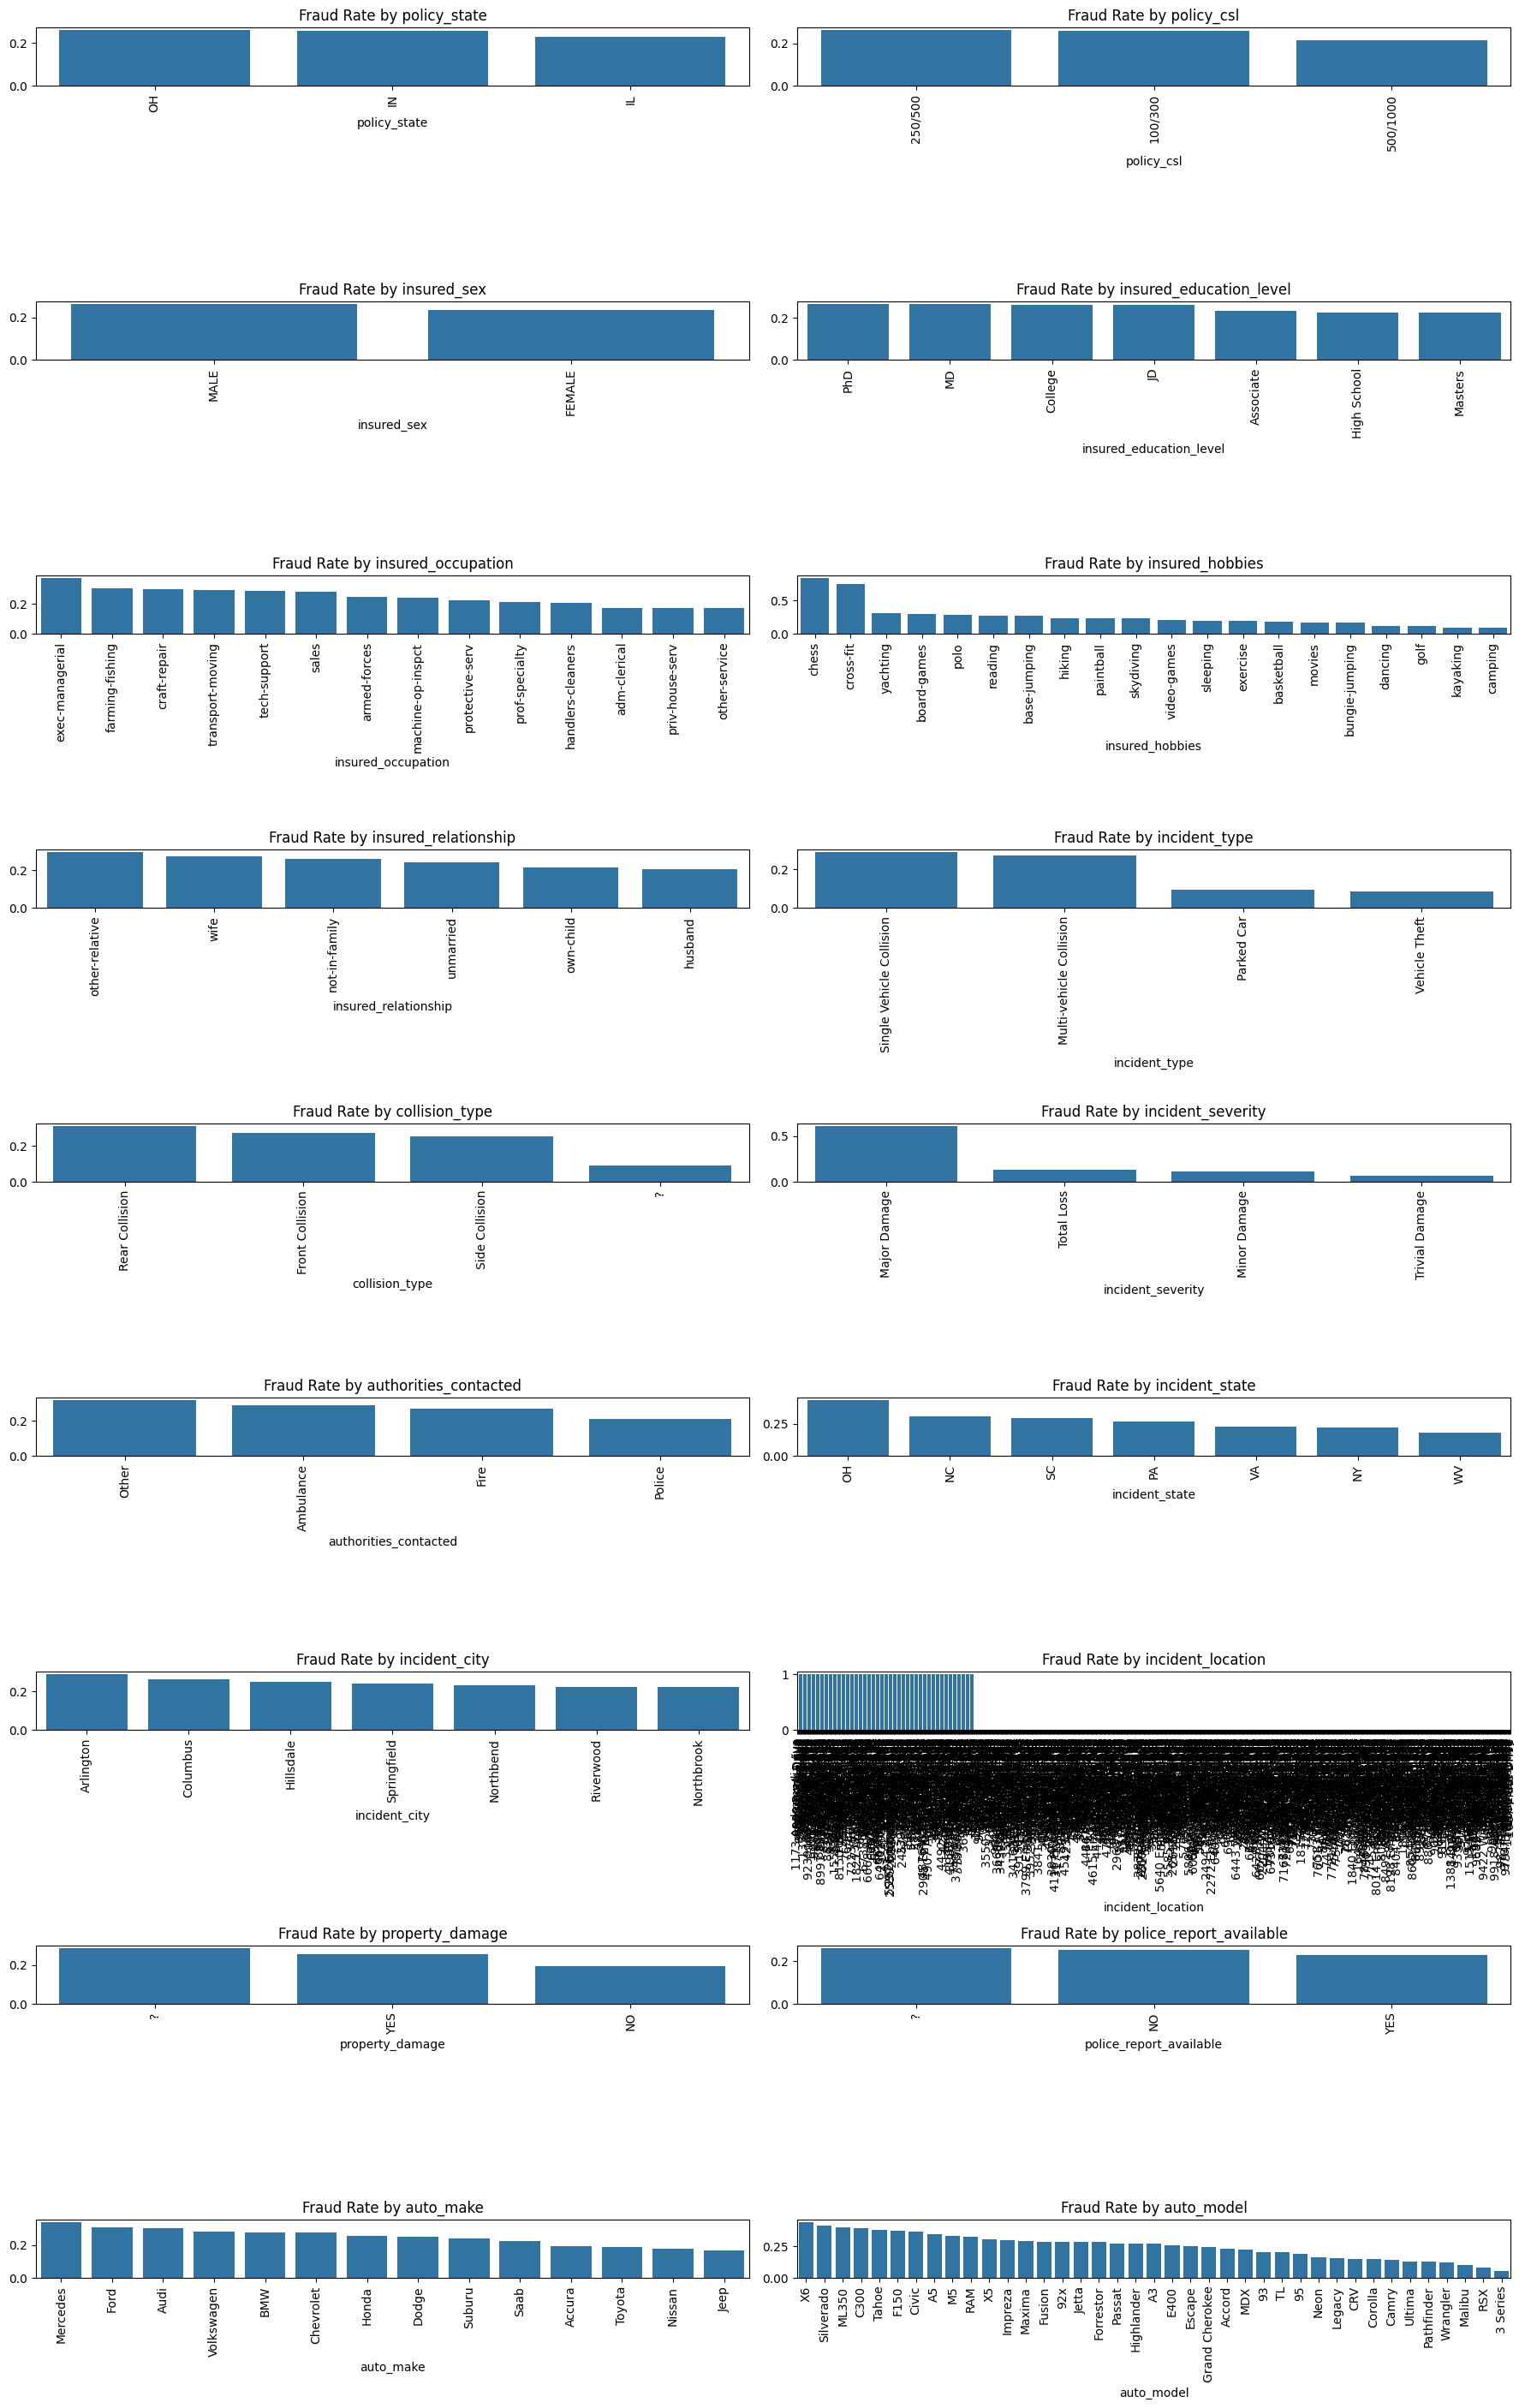

In [27]:
plt.figure(figsize=(18, 30))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols)//2 + 1, 2, i)
    sns.barplot(x=fraud_cat_rates[col].index, y=fraud_cat_rates[col].values)
    plt.title(f"Fraud Rate by {col}")
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()


Low cardinal columns are chosen and encoded to plot correlation heatmap

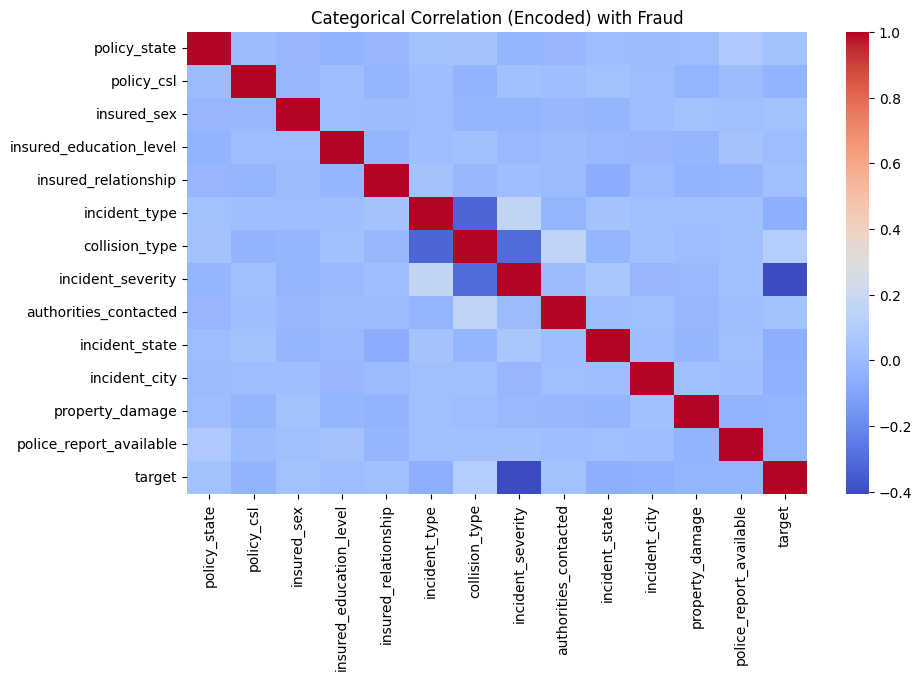

In [28]:
low_card = [col for col in cat_cols if df[col].nunique() <= 10]
heatmap_df = pd.DataFrame()

for col in low_card:
    heatmap_df[col] = df[col].astype('category').cat.codes

heatmap_df['target'] = df['target']

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df.corr(), annot=False, cmap='coolwarm')
plt.title("Categorical Correlation (Encoded) with Fraud")
plt.show()



Printed percentage based crosstab showing fraud rate for each category in low+high cardinal columns.

In [29]:
for col in low_cardinality:
    display(pd.crosstab(df[col], df['target'], normalize='index') * 100)


target,0,1
policy_state,,
IL,77.218935,22.781065
IN,74.516129,25.483871
OH,74.147727,25.852273


target,0,1
policy_csl,,
100/300,74.212034,25.787966
250/500,73.789174,26.210826
500/1000,78.333333,21.666667


target,0,1
insured_sex,,
FEMALE,76.536313,23.463687
MALE,73.866091,26.133909


target,0,1
insured_education_level,,
Associate,76.551724,23.448276
College,73.770492,26.229508
High School,77.500000,22.500000
JD,73.913043,26.086957
MD,73.611111,26.388889
Masters,77.622378,22.377622
PhD,73.600000,26.400000


target,0,1
insured_occupation,,
adm-clerical,83.076923,16.923077
armed-forces,75.362319,24.637681
craft-repair,70.270270,29.729730
exec-managerial,63.157895,36.842105
farming-fishing,69.811321,30.188679
handlers-cleaners,79.629630,20.370370
machine-op-inspct,76.344086,23.655914
other-service,83.098592,16.901408
priv-house-serv,83.098592,16.901408


target,0,1
insured_relationship,,
husband,79.411765,20.588235
not-in-family,74.137931,25.862069
other-relative,70.621469,29.378531
own-child,78.688525,21.311475
unmarried,75.886525,24.113475
wife,72.903226,27.096774


target,0,1
incident_type,,
Multi-vehicle Collision,72.792363,27.207637
Parked Car,90.476190,9.523810
Single Vehicle Collision,70.967742,29.032258
Vehicle Theft,91.489362,8.510638


target,0,1
collision_type,,
?,91.011236,8.988764
Front Collision,72.440945,27.559055
Rear Collision,68.835616,31.164384
Side Collision,74.637681,25.362319


target,0,1
incident_severity,,
Major Damage,39.492754,60.507246
Minor Damage,89.265537,10.734463
Total Loss,87.142857,12.857143
Trivial Damage,93.333333,6.666667


target,0,1
authorities_contacted,,
Ambulance,70.918367,29.081633
Fire,73.094170,26.905830
Other,68.181818,31.818182
Police,79.109589,20.890411


target,0,1
incident_state,,
NC,69.090909,30.909091
NY,77.862595,22.137405
OH,56.521739,43.478261
PA,73.333333,26.666667
SC,70.564516,29.435484
VA,77.272727,22.727273
WV,82.027650,17.972350


target,0,1
incident_city,,
Arlington,71.052632,28.947368
Columbus,73.825503,26.174497
Hillsdale,75.177305,24.822695
Northbend,76.551724,23.448276
Northbrook,77.868852,22.131148
Riverwood,77.611940,22.388060
Springfield,75.796178,24.203822


target,0,1
property_damage,,
?,71.388889,28.611111
NO,80.473373,19.526627
YES,74.172185,25.827815


target,0,1
police_report_available,,
?,74.052478,25.947522
NO,74.927114,25.072886
YES,77.070064,22.929936


target,0,1
auto_make,,
Accura,80.882353,19.117647
Audi,69.565217,30.434783
BMW,72.222222,27.777778
Chevrolet,72.368421,27.631579
Dodge,75.000000,25.000000
Ford,69.444444,30.555556
Honda,74.545455,25.454545
Jeep,83.582090,16.417910
Mercedes,66.153846,33.846154


In [30]:
for col in high_cardinality:
    display(pd.crosstab(df[col], df['target'], normalize='index') * 100)


target,0,1
insured_hobbies,,
base-jumping,73.469388,26.530612
basketball,82.352941,17.647059
board-games,70.833333,29.166667
bungie-jumping,83.928571,16.071429
camping,90.909091,9.090909
chess,17.391304,82.608696
cross-fit,25.714286,74.285714
dancing,88.372093,11.627907
exercise,80.701754,19.298246


target,0,1
incident_location,,
1012 5th Lane,0.0,100.0
1028 Sky Lane,100.0,0.0
1030 Pine Lane,0.0,100.0
1087 Flute Drive,100.0,0.0
1091 1st Drive,100.0,0.0
...,...,...
9929 Rock Drive,0.0,100.0
9935 4th Drive,0.0,100.0
9942 Tree Ave,0.0,100.0


target,0,1
auto_model,,
3 Series,94.444444,5.555556
92x,71.428571,28.571429
93,80.000000,20.000000
95,81.481481,18.518519
A3,72.972973,27.027027
A5,65.625000,34.375000
Accord,76.923077,23.076923
C300,61.111111,38.888889
CRV,85.000000,15.000000


Plotted countplot to show how fraud/non-fraud is distributed across top 15 category columns.

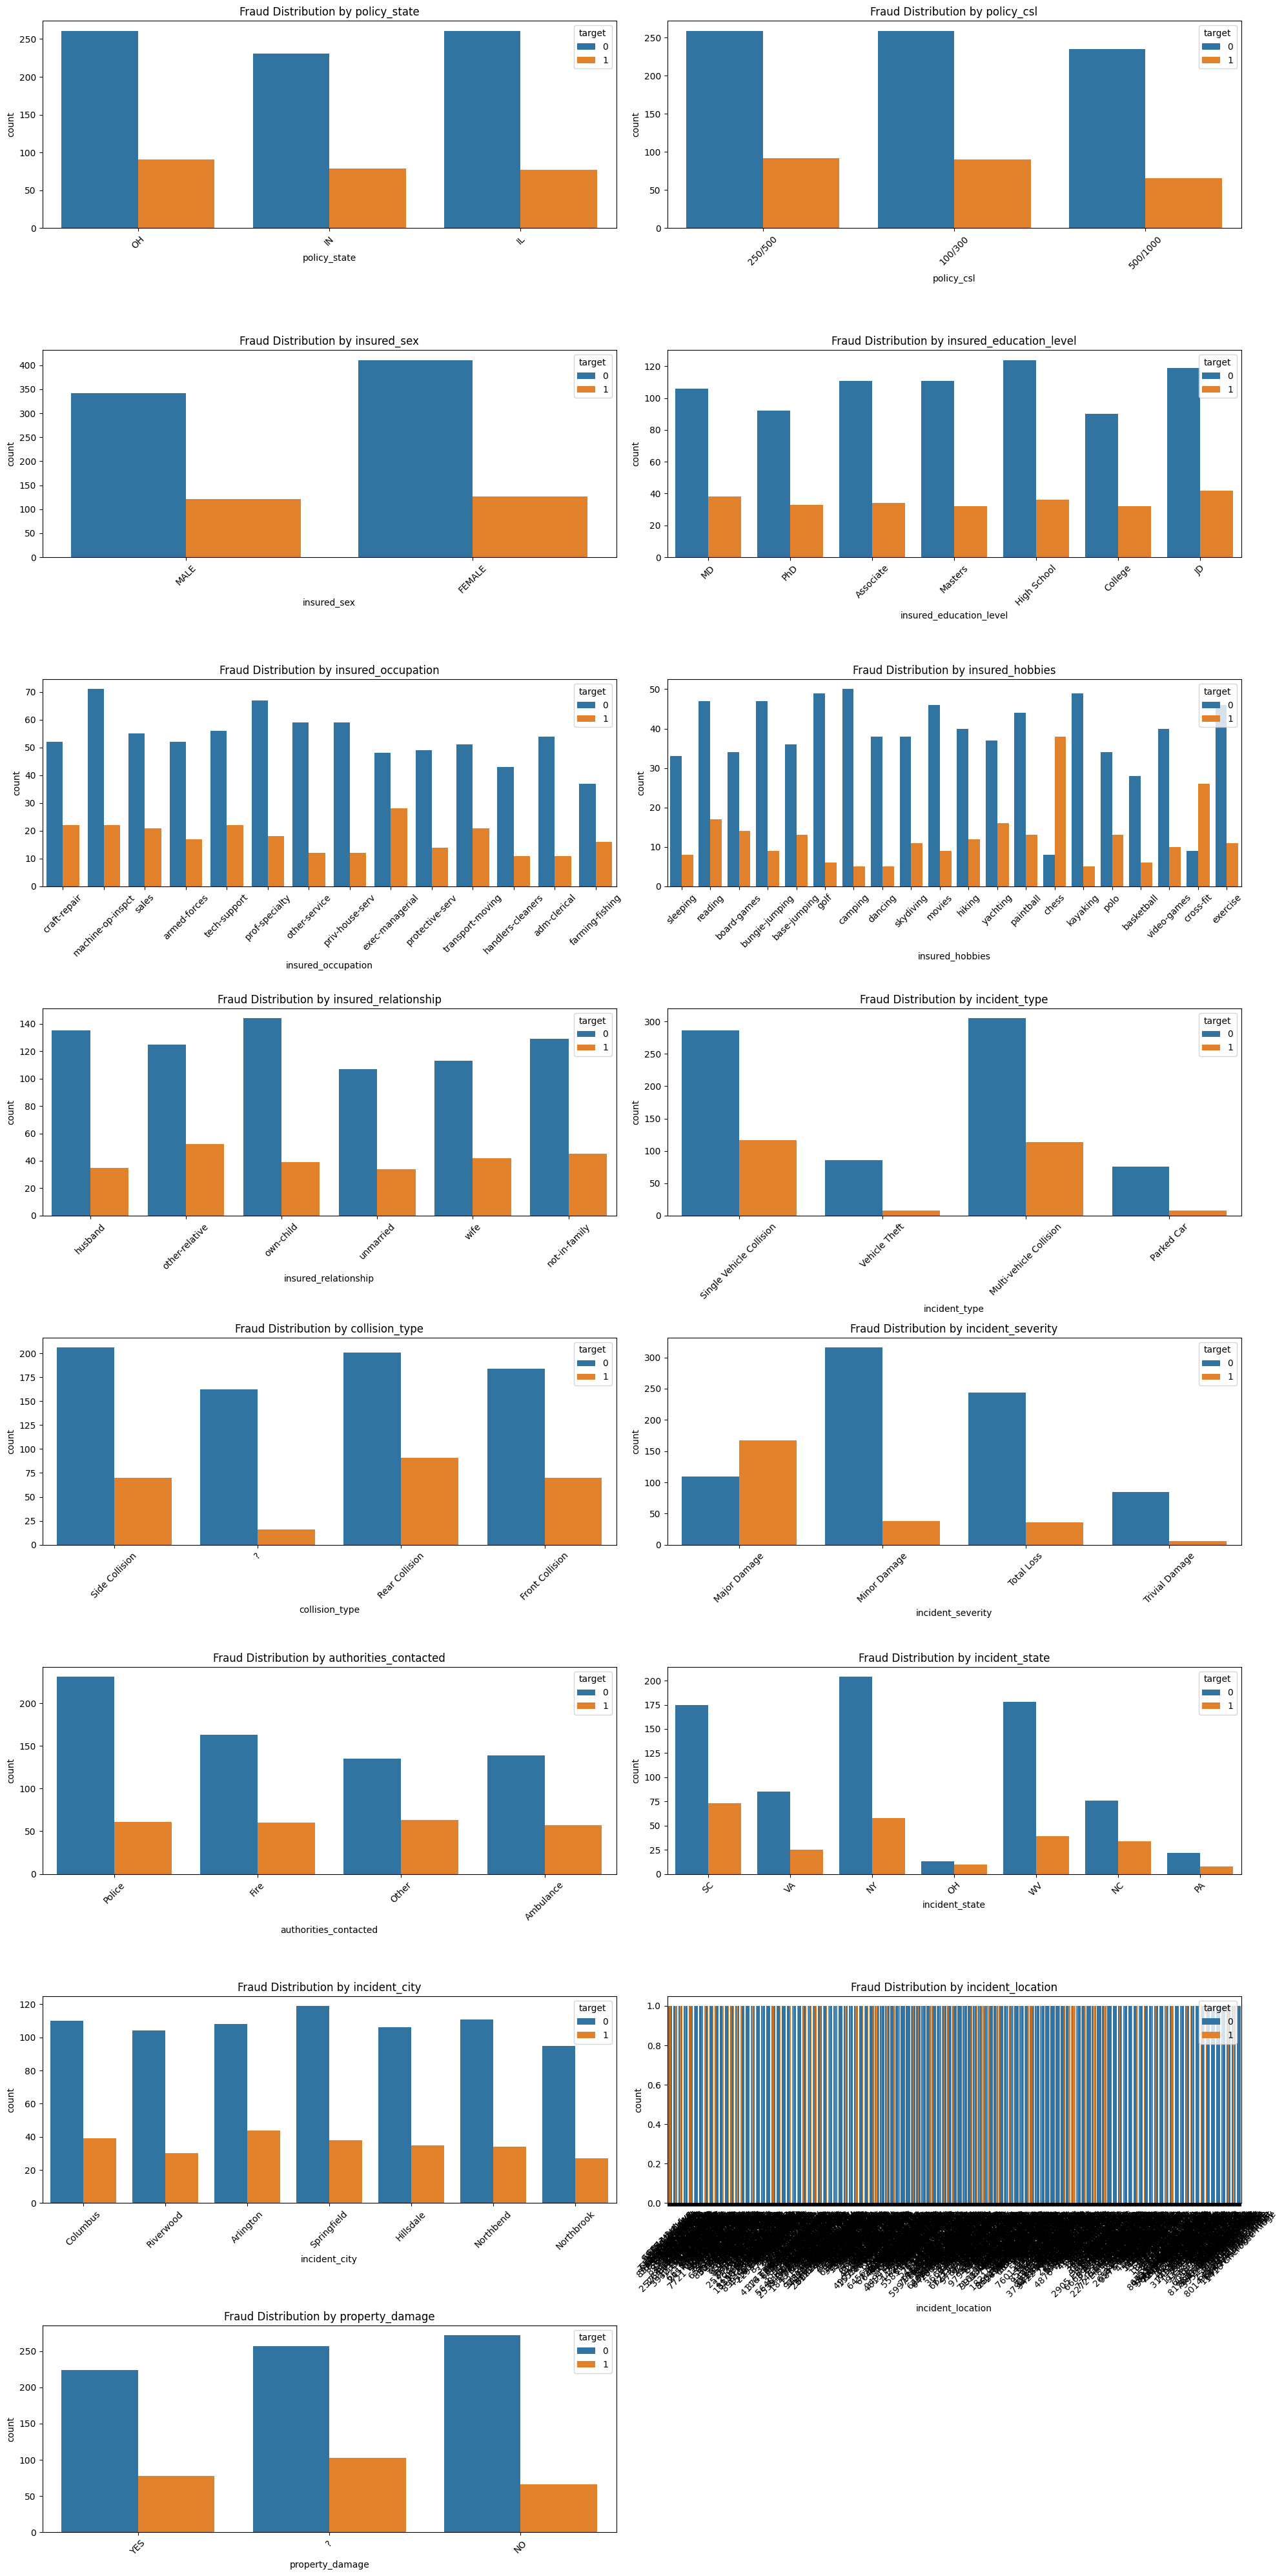

In [31]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(cat_cols[:15], 1):
    plt.subplot(8, 2, i)
    sns.countplot(x=col, hue='target', data=df)
    plt.title(f"Fraud Distribution by {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Calculated the number of invalid values in categorical columns and replaced them with unknown.

In [32]:
for col in cat_cols:
    invalid = df[col].isin(['?', 'None', 'NULL', '', ' ']).sum()
    print(f"{col}: {invalid} invalid values")


policy_state: 0 invalid values
policy_csl: 0 invalid values
insured_sex: 0 invalid values
insured_education_level: 0 invalid values
insured_occupation: 0 invalid values
insured_hobbies: 0 invalid values
insured_relationship: 0 invalid values
incident_type: 0 invalid values
collision_type: 178 invalid values
incident_severity: 0 invalid values
authorities_contacted: 0 invalid values
incident_state: 0 invalid values
incident_city: 0 invalid values
incident_location: 0 invalid values
property_damage: 360 invalid values
police_report_available: 343 invalid values
auto_make: 0 invalid values
auto_model: 0 invalid values


In [33]:
invalid_values = ['?', 'None', 'NULL', '', ' ']

df[cat_cols] = df[cat_cols].replace(invalid_values, 'Unknown')


Dropped unnecessary columns like identifiers, target before encoding, with high cardinality, numeric columns without any important patterns/correlation with the target along with highly skewed histogram and having high collinearity.

In [34]:
df_cleaned=df.drop(columns=['_c39','policy_number','insured_zip','fraud_reported','insured_hobbies','incident_location','auto_model','capital-gains','capital-loss','vehicle_claim'])
df_cleaned.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328,228,134,256,228,256,137,165,27,212,...,286,257,94,124,141,3,285,130,458,456
age,48,42,29,41,44,39,34,37,33,42,...,43,44,26,28,30,38,41,34,62,60
policy_bind_date,2014-10-17 00:00:00,2006-06-27 00:00:00,2000-09-06 00:00:00,1990-05-25 00:00:00,2014-06-06 00:00:00,2006-10-12 00:00:00,2000-06-04 00:00:00,1990-02-03 00:00:00,1997-02-05 00:00:00,2011-07-25 00:00:00,...,1994-02-05 00:00:00,2006-07-12 00:00:00,2007-10-24 00:00:00,2001-12-08 00:00:00,2007-03-24 00:00:00,1991-07-16 00:00:00,2014-01-05 00:00:00,2003-02-17 00:00:00,2011-11-18 00:00:00,1996-11-11 00:00:00
policy_state,OH,IN,OH,IL,IL,OH,IN,IL,IL,IL,...,IL,OH,IN,OH,IN,OH,IL,OH,IL,OH
policy_csl,250/500,250/500,100/300,250/500,500/1000,250/500,250/500,100/300,100/300,100/300,...,100/300,100/300,100/300,250/500,500/1000,500/1000,100/300,250/500,500/1000,250/500
policy_deductable,1000,2000,2000,2000,1000,1000,1000,1000,500,500,...,500,1000,500,1000,1000,1000,1000,500,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0,5000000,5000000,6000000,6000000,0,0,0,0,0,...,3000000,0,0,0,0,0,0,3000000,5000000,0
insured_sex,MALE,MALE,FEMALE,FEMALE,MALE,FEMALE,MALE,MALE,FEMALE,MALE,...,FEMALE,MALE,MALE,MALE,MALE,FEMALE,FEMALE,FEMALE,MALE,FEMALE
insured_education_level,MD,MD,PhD,PhD,Associate,PhD,PhD,Associate,PhD,PhD,...,MD,MD,MD,MD,High School,Masters,PhD,Masters,Associate,Associate


Created lists of numerical and categorical columns separately, remove target column, convert numerical columns having very few unique categories and date-time columns to categorical columns.

In [35]:
num_cols = df_cleaned.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

if 'target' in num_cols:
    num_cols.remove('target')

num_to_cat=['policy_deductable','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','umbrella_limit','auto_year']
for col in num_to_cat:
    if col in num_cols:
        num_cols.remove(col)
        if col not in cat_cols:
            cat_cols.append(col)

for col in ['incident_month', 'incident_day_of_week']:
    if col in df_cleaned.columns and col not in cat_cols:
        cat_cols.append(col)


print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)


Numeric columns: ['months_as_customer', 'age', 'policy_annual_premium', 'total_claim_amount', 'injury_claim', 'property_claim', 'policy_duration_days']
Categorical columns: ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'policy_deductable', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'umbrella_limit', 'auto_year', 'incident_month', 'incident_day_of_week']


Created numerical and categorical pipelines separately with Imputer and Scaler/OneHotEncoder and generated the Column Transformer preprocessor.

In [36]:
numeric_pipe=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
category_pipe=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='Unknown')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor=ColumnTransformer(
    transformers=[
        ('numeric', numeric_pipe, num_cols),
        ('category', category_pipe, cat_cols)
    ],
    remainder='drop'
)
preprocessor

,transformers,"[('numeric', ...), ('category', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


Separated X and y on the basis of target column and performed train_test_split in 80/20 ratio. Also created the AdaBoost baseline pipeline combining the preprocessor and AdaBoost classifier and fitted and predicted the baseline model. Calculated the model metrics showing confusion matrix, classification report, ROC-AUC score.

In [37]:
X=df_cleaned.drop(columns=['target'])
y=df_cleaned['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

print(X_train.shape,X_test.shape)

(800, 33) (200, 33)


In [38]:
base_tree=DecisionTreeClassifier(
    max_depth=3,
    class_weight={0:1,1:2},
    random_state=42
)

ada_baseline= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', AdaBoostClassifier(
        estimator=base_tree,
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    ))
])

ada_baseline.fit(X_train,y_train)

,steps,"[('preprocessor', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('category', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [39]:
y_pred=ada_baseline.predict(X_test)
y_prob=ada_baseline.predict_proba(X_test)[:, 1]

print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))
print('Classification Report:\n', classification_report(y_test,y_pred))

auc_score=roc_auc_score(y_test,y_prob)
print("ROC-AUC Score:", auc_score)

Confusion Matrix:
 [[130  21]
 [ 15  34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       151
           1       0.62      0.69      0.65        49

    accuracy                           0.82       200
   macro avg       0.76      0.78      0.77       200
weighted avg       0.83      0.82      0.82       200

ROC-AUC Score: 0.7846330585214218


Improving model performance using SMOTE

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

base_tree=DecisionTreeClassifier(
    max_depth=3,
    class_weight={0:1,1:2},
    random_state=42
)

smote_ada= ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', AdaBoostClassifier(
        estimator=base_tree,
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    ))
])

smote_ada.fit(X_train,y_train)

y_pred_smote=smote_ada.predict(X_test)
y_prob_smote=smote_ada.predict_proba(X_test)[:,1]

print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassReport:\n", classification_report(y_test, y_pred_smote))

print("ROC-AUC:", roc_auc_score(y_test, y_prob_smote))


Confusion:
 [[124  27]
 [ 13  36]]

Report:
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       151
           1       0.57      0.73      0.64        49

    accuracy                           0.80       200
   macro avg       0.74      0.78      0.75       200
weighted avg       0.82      0.80      0.81       200

ROC-AUC: 0.8228814704689822


Hyperparameter Tuning using RandomizedSearchCV

In [57]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

param_dist = {
    'clf__n_estimators': [100, 150, 200, 300, 400],
    'clf__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'clf__estimator__max_depth': [1, 2, 3, 4],
    'clf__estimator__min_samples_split': [2, 5, 10, 20],
    'clf__estimator__min_samples_leaf': [1, 2, 4],
    'clf__estimator__class_weight': [
        {0:1, 1:1},
        {0:1, 1:2},
        {0:1, 1:3},
        {0:1, 1:4}
    ]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    smote_ada,
    param_distributions=param_dist,
    n_iter=25,
    scoring='f1_macro',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

tuned_model = search.best_estimator_
print("Best Params:", search.best_params_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


c:\Users\arnav\Desktop\Python_projects\EDA\venv\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
8 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
8 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\arnav\Desktop\Python_projects\EDA\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\arnav\Desktop\Python_projects\EDA\venv\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\arnav\Desktop\Python_projects\EDA\

Best Params: {'clf__n_estimators': 100, 'clf__learning_rate': 0.1, 'clf__estimator__min_samples_split': 2, 'clf__estimator__min_samples_leaf': 4, 'clf__estimator__max_depth': 1, 'clf__estimator__class_weight': {0: 1, 1: 2}}


In [59]:
y_pred_tuned = tuned_model.predict(X_test)
y_prob_tuned = tuned_model.predict_proba(X_test)[:, 1]

print("TUNED MODEL RESULTS\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))
print("\nROC-AUC:", roc_auc_score(y_test, y_prob_tuned))


TUNED MODEL RESULTS

Confusion Matrix:
 [[130  21]
 [ 13  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       151
           1       0.63      0.73      0.68        49

    accuracy                           0.83       200
   macro avg       0.77      0.80      0.78       200
weighted avg       0.84      0.83      0.83       200


ROC-AUC: 0.7978105149344505


The model having highest recall and ROC-AUC is chosen as the final model (Un-tuned SMOTE) and ROC-curve and confusion matrix is plotted.

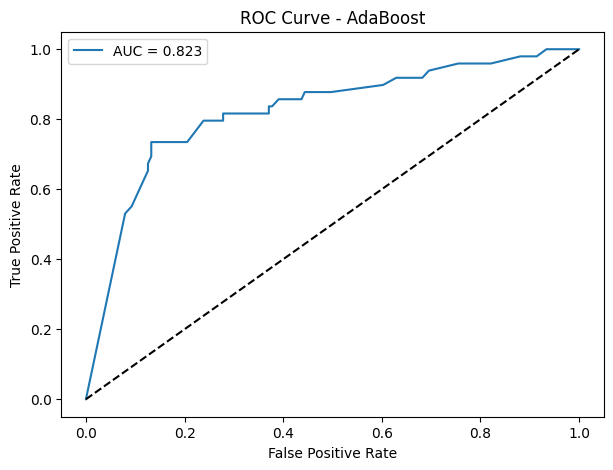

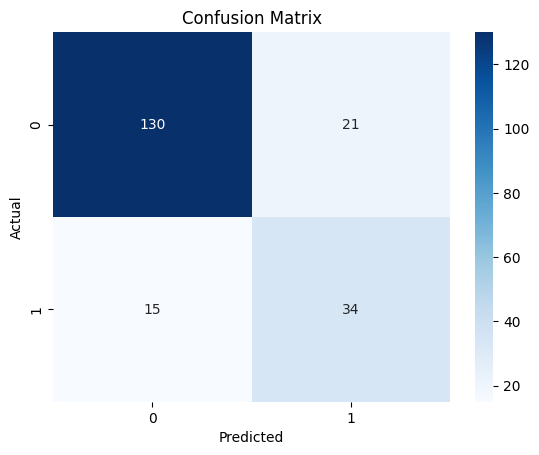

In [56]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob_smote)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test,y_prob_smote):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost")
plt.legend()
plt.show()

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

